In [130]:
import numpy as np
import torch
import scipy as sp

In [131]:
import scipy
scipy.__version__

'1.9.1'

In [158]:
import scipy.integrate as si
from scipy.optimize import minimize

def dg(x):
    norm_g = 1/np.sqrt(2*np.pi)
    return norm_g * np.exp(-(x**2)/2)

def Theta(u, v, beta=1, q0=0.1, q1=0.1, m=0.1, j0=0, h=0):
    a = np.sqrt(q0)*u if q0 >0 else 0
    b = np.sqrt(q1-q0)*v if q1 > q0 else 0
    return beta*(a + b + j0*m + h)

def f_gauss_cosh(u, v, q0=0.1, q1=0.1, m=0.1, m1=0.1, beta = 1, j0=0, h=0):
    Theta_ = Theta(u, v, beta=beta, q0=q0, q1=q1, m=m, j0=j0, h=h)
    return dg(v) * np.power(np.cosh(Theta_),m1)

def f_gauss_coshtanh(u, v, q0=0.1, q1=0.1, m=0.1, m1=0.1, beta = 1, j0=0, h=0):
    Theta_ = Theta(u, v, beta=beta, q0=q0, q1=q1, m=m, j0=j0, h=h)
    #print(Theta_, np.tanh(Theta_), np.cosh(Theta_), m1)
    return dg(v) * np.power(np.cosh(Theta_),m1) * np.tanh(Theta_)

def f_gauss_coshtanh2(u, v, q0=0.1, q1=0.1, m=0.1, m1=0.1, beta = 1, j0=0, h=0):
    Theta_ = Theta(u, v, beta=beta, q0=q0, q1=q1, m=m, j0=j0, h=h)
    #print(Theta_, np.tanh(Theta_), np.cosh(Theta_), m1)
    return dg(v) * np.power(np.cosh(Theta_),m1) * np.power(np.tanh(Theta_),2)

#double gauss
def gauss_cosh_int2(u, q0=0.1, q1=0.1, m=0.1, m1=0.1, beta = 1, j0=0, h=0, range_=10):
    partial_func = lambda v: f_gauss_cosh(u, v, q0=q0, q1=q1, m=m, m1=m1, beta=beta, j0=j0, h=h)
    return dg(u) * np.log(si.quad(partial_func, -range_, range_)[0])

def double_gauss_1RSB(q0=0.1, q1=0.1, m=0.1, m1=0.1, beta = 1, j0=0, h=0, range_=5):
    if m1 < 1e-10:
        return 0
    return - (1./m1) * si.quad(gauss_cosh_int2, -range_, range_, args=(q0,q1,m,m1,beta,j0,h,range_))[0]

#cond code

# m
def gauss_m_int2(u, q0=0.1, q1=0.1, m=0.1, m1=0.1, beta = 1, j0=0, h=0, range_=5):
    partial_func1 = lambda v: f_gauss_cosh(u, v, q0=q0, q1=q1, m=m, m1=m1, beta=beta, j0=j0, h=h)
    partial_func2 = lambda v: f_gauss_coshtanh(u, v, q0=q0, q1=q1, m=m, m1=m1, beta=beta, j0=j0, h=h)
    partial_res1 = si.quad(partial_func1, -range_, range_)[0]
    partial_res2 = si.quad(partial_func2, -range_, range_)[0]
    #print(partial_res1, partial_res2)
    if partial_res1 != 0:
        return dg(u) * partial_res2 / partial_res1
    elif partial_res2 == 0 and partial_res1 == 0:
        return 0
    else:
        print("gauss_m_int2")
        print("partial_res2 = ", partial_res2, "partial_res1 = ", partial_res1, "ERRORR")
        return np.inf


def cond_m_1RSB(q0, q1, m, m1,  beta = 1, j0=0, h=0, range_=5):
    return si.quad(gauss_m_int2, -range_, range_, args=(q0,q1,m,m1,beta,j0,h,range_))[0]

# q0
def gauss_q0_int2(u, q0=0.1, q1=0.1, m=0.1, m1=0.1, beta = 1, j0=0, h=0, range_=5):
    partial_func1 = lambda v: f_gauss_cosh(u, v, q0=q0, q1=q1, m=m, m1=m1, beta=beta, j0=j0, h=h)
    partial_func2 = lambda v: f_gauss_coshtanh(u, v, q0=q0, q1=q1, m=m, m1=m1, beta=beta, j0=j0, h=h)
    partial_res1 = si.quad(partial_func1, -range_, range_)[0]
    partial_res2 = si.quad(partial_func2, -range_, range_)[0]
    #print(partial_res1, partial_res2)
    if partial_res1 != 0:
        return dg(u) * np.power(partial_res2 / partial_res1,2)
    elif partial_res2 == 0 and partial_res1 == 0:
        print("gauss_q0_int2")
        print("partial_res2 = ", partial_res2, "partial_res1 = ", partial_res1, "ERRORR")
        return 0
    else:
        print("gauss_q0_int2")
        print("partial_res2 = ", partial_res2, "partial_res1 = ", partial_res1, "ERRORR")
        return np.inf



def cond_q0_1RSB(q0, q1, m, m1,  beta = 1, j0=0, h=0, range_=5):
    return si.quad(gauss_q0_int2, -range_, range_, args=(q0,q1,m,m1,beta,j0,h,range_))[0]

# q1
def gauss_q1_int2(u, q0=0.1, q1=0.1, m=0.1, m1=0.1, beta = 1, j0=0, h=0, range_=5):
    partial_func1 = lambda v: f_gauss_cosh(u, v, q0=q0, q1=q1, m=m, m1=m1, beta=beta, j0=j0, h=h)
    partial_func2 = lambda v: f_gauss_coshtanh2(u, v, q0=q0, q1=q1, m=m, m1=m1, beta=beta, j0=j0, h=h)
    partial_res1 = si.quad(partial_func1, -range_, range_)[0]
    partial_res2 = si.quad(partial_func2, -range_, range_)[0]
    #print(f"gauss_q1_int2, q0:{q0}, q1:{q1}, m:{m}, m1:{m1}, beta:{beta}, j0:{j0}, h:{h}, dx:{dx}, range_:{range_}")
    #print(partial_res1, partial_res2)
    if partial_res1 != 0:
        return dg(u) * partial_res2 / partial_res1
    elif partial_res2 == 0 and partial_res1 == 0:
        return 0
    else:
        print("gauss_q1_int2")
        print("partial_res2 = ", partial_res2, "partial_res1 = ", partial_res1, "ERRORR")
        return np.inf


def cond_q1_1RSB(q0, q1, m, m1,  beta = 1, j0=0, h=0, range_=5):
    return si.quad(gauss_q1_int2, -range_, range_, args=(q0,q1,m,m1,beta,j0,h,range_))[0]



# FREE ENERGY ***************************************************************************************************************

def minus_beta_f_1RSB(m1, q0 = 0, q1=0, m=0, beta=1, j0=0, h=0):
    a = (beta**2/4)*((m1-1)*q1**2 - m1*q0**2 + 2*q1 - 1) + 0.5*beta*j0*m**2 - np.log(2)
    b = double_gauss_1RSB(q0, q1, m, m1, beta=beta, j0=j0, h=h)
    return - (a + b)

def f_1RSB(m1, q0 = 0, q1=0, m=0, beta=1, j0=0, h=0):
    return -minus_beta_f_1RSB(m1, q0 = q0, q1=q1, m=m, beta=beta, j0=j0, h=h)/beta


# SOLVERS **********************************************************************************************************************

def solver_1RSB_m(beta, q0, q1, m, m1, j0 = 0, h = 0, tol=1e-5, maxiter=100):
    #print("m solver")
    err = 1
    it_ = 0
    m_init = m
    while err > tol and it_ < maxiter:
        m = cond_m_1RSB(q0, q1, m, m1,  beta = beta, j0=j0, h=h)
        #print(f"m: {m}, m_init: {m_init}, err: {err}")
        err = np.abs(m - m_init)
        m_init = m
        it_ += 1
    return m

def solver_1RSB_q0(beta, q0, q1, m, m1, j0 = 0, h = 0, tol=1e-5, maxiter=100):
    #print("q0 solver")
    
    err = 1
    it_ = 0
    q0_init = q0
    while err > tol and it_ < maxiter:
        q0 = cond_q0_1RSB(q0, q1, m, m1,  beta = beta, j0=j0, h=h)
        err = np.abs(q0 - q0_init)
        q0_init = q0
        it_ += 1
    return q0

def solver_1RSB_q1(beta, q0, q1, m, m1, j0 = 0, h = 0, tol=1e-5, maxiter=100):
    #print("q1 solver")
    err = 1
    it_ = 0
    q1_init = q1
    while err > tol and it_ < maxiter:
        q1 = cond_q1_1RSB(q0, q1, m, m1,  beta = beta, j0=j0, h=h)
        err = np.abs(q1 - q1_init)
        q1_init = q1
        it_ += 1
    return q1

def solver_1RSB(beta, j0 = 0, h = 0, q0_init = 0.1, q1_init = 0.1, m_init = 0.1, m1_init = 0.1, tol=1e-6, maxiter=100, damp=0.5):
    err = 1
    it_ = 0
    m = m_init
    q0 = q0_init
    q1 = q1_init
    m1 = m1_init
    m1_init0 = m1_init
    print(f"beta = {beta:2f}, m = {m}, q0 = {q0}, q1 = {q1}, m1 = {m1}, it = {it_}, err = {err}")

    while err > tol and it_ < maxiter:
        for i in range(10):
            q0 = damp * solver_1RSB_q0(beta, q0_init, q1_init, m_init, m1_init, j0 = j0, h = h, tol=tol) + (1-damp) * q0_init
            q1 = damp * solver_1RSB_q1(beta, q0_init, q1_init, m_init, m1_init, j0 = j0, h = h, tol=tol) + (1-damp) * q1_init
            m = damp * solver_1RSB_m(beta, q0_init, q1_init, m_init, m1_init, j0 = j0, h = h, tol=tol) + (1-damp) * m_init
            q0_init = q0
            q1_init = q1
            m1_init = m1

        res = minimize(minus_beta_f_1RSB, [m1_init0], args=(q0_init, q1_init, m_init, beta, j0, h), bounds=[(0,1)], tol=tol)
        m1 = damp * res.x[0] + (1-damp) * m1_init
        err = np.abs(m1-m1_init) + np.abs(m-m_init) + np.abs(q0-q0_init) + np.abs(q1-q1_init)
        q0_init = q0
        q1_init = q1
        m1_init = m1
        m_init = m
        it_ += 1
        print(f"beta = {beta:.2f}, m = {m:.3e}, q0 = {q0:.3e}, q1 = {q1:.3e}, q1-q0 = {q1-q0:.3e}, m1 = {m1:.3e}, it = {it_}, err = {err:.3e}, tol = {tol:.3e}")

    return q0, q1, m, m1, it_


q0=0.1
q1=0.1
m=0.1
m1=0.1
beta=1
j0=0
h=0
dx=0.001
range_=5
tol=1e-4
print(double_gauss_1RSB(q0, q1, m, m1, beta=beta, j0=j0, h=h,  range_=range_))
print(cond_m_1RSB(q0, q1, m, m1, beta=beta, j0=j0, h=h,range_=range_))
print(cond_q0_1RSB(q0, q1, m, m1, beta=beta, j0=j0, h=h,  range_=range_))
print(cond_q1_1RSB(q0, q1, m, m1, beta=beta, j0=j0, h=h,range_=range_))


-0.04777149430379556
0.0
0.0842134356404132
0.0842134356404132


beta = 10.000000, m = 1e-05, q0 = 0.4, q1 = 0.95, m1 = 0.2, it = 0, err = 1
beta = 10.00, m = 5.000e-06, q0 = 6.181e-01, q1 = 9.804e-01, q1-q0 = 3.624e-01, m1 = 1.000e-01, it = 1, err = 1.000e-01, tol = 1.000e-06
beta = 10.00, m = 2.500e-06, q0 = 3.652e-01, q1 = 9.626e-01, q1-q0 = 5.974e-01, m1 = 1.021e-01, it = 2, err = 2.061e-03, tol = 1.000e-06
beta = 10.00, m = 1.250e-06, q0 = 3.733e-01, q1 = 9.632e-01, q1-q0 = 5.899e-01, m1 = 1.038e-01, it = 3, err = 1.761e-03, tol = 1.000e-06
beta = 10.00, m = 6.250e-07, q0 = 3.804e-01, q1 = 9.637e-01, q1-q0 = 5.833e-01, m1 = 1.053e-01, it = 4, err = 1.520e-03, tol = 1.000e-06
beta = 10.00, m = 3.125e-07, q0 = 3.863e-01, q1 = 9.641e-01, q1-q0 = 5.778e-01, m1 = 1.067e-01, it = 5, err = 1.314e-03, tol = 1.000e-06
beta = 10.00, m = 1.563e-07, q0 = 3.914e-01, q1 = 9.644e-01, q1-q0 = 5.730e-01, m1 = 1.078e-01, it = 6, err = 1.136e-03, tol = 1.000e-06
beta = 10.00, m = 7.813e-08, q0 = 3.957e-01, q1 = 9.647e-01, q1-q0 = 5.690e-01, m1 = 1.088e-01, it = 7

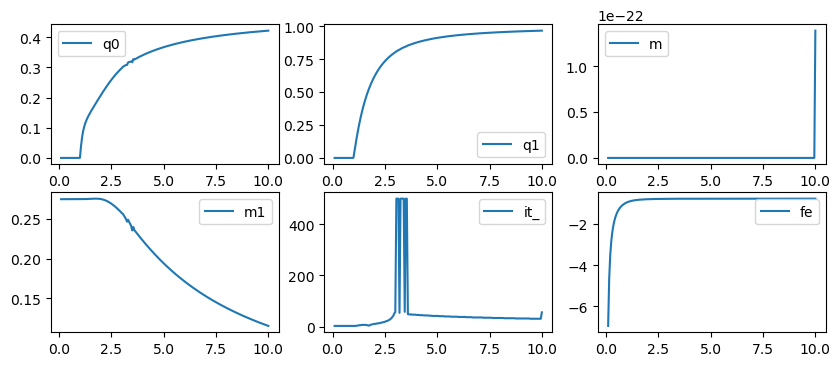

In [174]:
j0=0
h=0
from scipy.optimize import minimize
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(10,4))
bbs=np.arange(10., 0.05, -0.05)
#bbs=[0.1]
q0=[]
q1=[]
m = []
m1 = []
it_= []
fe_1RSB = []
tol=1e-6
qq0 = 0.4
qq1 = 0.95
mm = 0.00001
mm1 = 0.2
for beta in bbs:
    qq0, qq1, mm, mm1, itt_ = solver_1RSB(beta, j0 = j0, h = h, q0_init = qq0, q1_init = qq1, m_init = mm, m1_init = mm1, tol=tol, maxiter=500)
    q0.append(qq0)
    q1.append(qq1)
    m.append(mm)
    m1.append(mm1)
    it_.append(itt_)
    fe_1RSB.append(f_1RSB(mm1, q0 = qq0, q1=qq1, m=mm, beta=beta, j0=j0, h=h))
axs[0][0].plot(bbs, q0, label='q0')
axs[0][1].plot(bbs, q1, label='q1')
axs[0][2].plot(bbs, m, label='m')
axs[1][0].plot(bbs, m1 , label='m1')
axs[1][1].plot(bbs, it_ , label='it_')
axs[1][2].plot(bbs, fe_1RSB , label='fe')
axs[0][0].legend()
axs[0][1].legend()
axs[0][2].legend()
axs[1][0].legend()
axs[1][1].legend()
axs[1][2].legend()
plt.show()

In [179]:
import pandas as pd

df = pd.DataFrame({'beta': bbs, 'q0': q0, 'q1': q1, 'm': m, 'm1': m1, 'it': it_, 'fe': fe_1RSB})
df.to_csv('df_1RSB.gz')

free energy at $\beta=\infty$ is: $fe(\infty)=\sqrt(2/\pi) = 0.797885$

In [180]:
from scipy.optimize import minimize


def int_f(ff, dx=0.001):
    x=np.arange(-10, 10, dx)
    y = ff(x)
    return np.trapz(y, x=x)

# 1RS equations

import numpy as np

# RS equations

def H_z(z, q, m, j0=0, h=0):
    return np.sqrt(q)*z + j0*m + h

def gauss_RS(q, m, beta = 1, j0=0, h=0, range_=10):
    func = lambda z: dg(z) * np.log(2*np.cosh(beta*H_z(z, q, m, j0, h)))
    return si.quad(func, -range_, range_)[0]


def cond_m_RS(q, m, beta = 1, j0=0, h=0, range_=10):
    func = lambda z: dg(z) * np.tanh(beta*H_z(z, q, m, j0, h))
    return si.quad(func, -range_, range_)[0]

def minus_beta_f_RS(q, m=0, beta=1, j0=0, h=0):
    #print(beta)
    a = (beta**2/4)*(1-q)**2
    b = - 0.5*beta*m**2
    c = gauss_RS(q, m, beta = beta, j0 = j0, h=0)
    return (a + b + c)

def f_RS(q, m=0,  beta=1, j0=0, h=0):
    return - minus_beta_f_RS(q, m, beta, j0, h)/beta

def minus_beta_f_RS_old(x, beta=1, j0=0, h=0):
    #print(beta)
    q = x[0]
    m = x[1]
    a = (beta**2/4)*(1-q)**2
    b = - 0.5*m**2
    c = gauss_RS(q, m, beta = beta, j0 = j0, h=0)
    return (a + b + c)

def f_RS_old(x, beta=1, j0=0, h=0):
    return - beta_f_RS(x, beta, j0, h)/beta


# solvers RS

def solver_RS_m(beta, j0 = 0, h = 0, q = 0.1, m_init = 0.1, tol=1e-6, maxiter=100):
    err = 1
    it_ = 0
    while err > tol and it_ < maxiter:
        m = cond_m_RS(q, m_init, beta, j0, h)
        err = np.abs(m - m_init)
        m_init = m
        it_ += 1
    return m

def solver_RS(beta, j0 = 0, h = 0, q_init = 0.1, m_init = 0.1, tol=1e-6, maxiter=1000):
    err = 1
    it_ = 0
    while err > tol and it_ < maxiter:
        m = cond_m_RS(q_init, m_init, beta, j0, h)
        res = minimize(minus_beta_f_RS, [q_init], args=(m,beta,j0,h), bounds=[(0,1)], tol=tol)
        q = res.x[0]
        err = np.abs(q-q_init)
        q_init = q
        m_init = m
        it_ += 1
        if it_ % 100 == 0:
            print(f"beta = {beta:.2f}, m = {m:.2e}, it = {it_}, err = {err:.2e}")
        if it_ < 10:
            print(f"beta = {beta:.2f}, m = {m:.2e}, it = {it_}, err = {err:.2e}")

    return q, m, it_



beta = 10.00, m = 0.00e+00, it = 1, err = 8.17e-01
beta = 10.00, m = 0.00e+00, it = 2, err = 0.00e+00
beta = 9.95, m = 0.00e+00, it = 1, err = 8.17e-01
beta = 9.95, m = 0.00e+00, it = 2, err = 0.00e+00
beta = 9.90, m = 0.00e+00, it = 1, err = 8.16e-01
beta = 9.90, m = 0.00e+00, it = 2, err = 2.80e-08
beta = 9.85, m = 0.00e+00, it = 1, err = 8.16e-01
beta = 9.85, m = 0.00e+00, it = 2, err = 2.83e-08
beta = 9.80, m = 0.00e+00, it = 1, err = 8.15e-01
beta = 9.80, m = 0.00e+00, it = 2, err = 2.47e-08
beta = 9.75, m = 0.00e+00, it = 1, err = 8.15e-01
beta = 9.75, m = 0.00e+00, it = 2, err = 3.06e-08
beta = 9.70, m = 0.00e+00, it = 1, err = 8.14e-01
beta = 9.70, m = 0.00e+00, it = 2, err = 2.70e-08
beta = 9.65, m = 0.00e+00, it = 1, err = 8.14e-01
beta = 9.65, m = 0.00e+00, it = 2, err = 2.92e-08
beta = 9.60, m = 0.00e+00, it = 1, err = 8.13e-01
beta = 9.60, m = 0.00e+00, it = 2, err = 2.38e-08
beta = 9.55, m = 0.00e+00, it = 1, err = 8.13e-01
beta = 9.55, m = 0.00e+00, it = 2, err = 3.99e-0

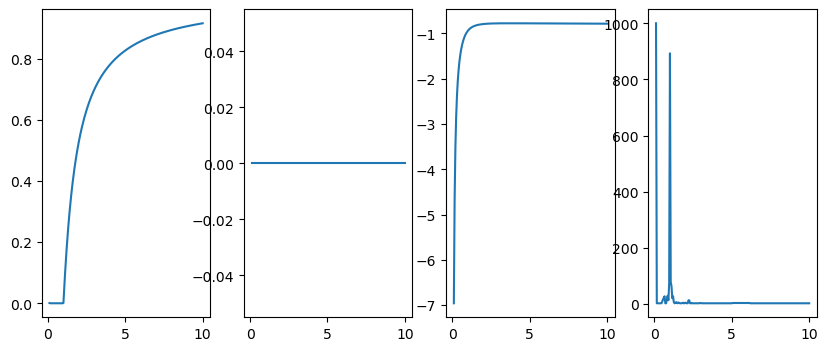

In [181]:
j0=0
h=0
from scipy.optimize import minimize
fig, axs = plt.subplots(1, 4, figsize=(10,4))
q=[]
#bbs=np.arange(0.1, 20, 0.5)
fe_RS = []
m = []
it_= []
for beta in bbs:
    qq,mm,itt_ =solver_RS(beta, j0, h)
    q.append(qq)
    m.append(mm)
    it_.append(itt_)
    fe_RS.append(f_RS(qq, mm, beta, j0, h))
axs[0].plot(bbs, q)
axs[1].plot(bbs, m)
axs[2].plot(bbs, fe_RS)
axs[3].plot(bbs, it_)

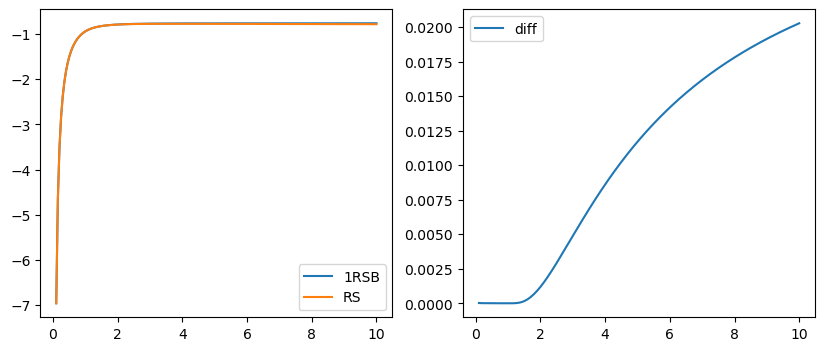

In [182]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].plot(bbs, fe_1RSB, label='1RSB')
axs[0].plot(bbs, fe_RS, label='RS')
axs[0].legend()
axs[1].plot(bbs, np.array(fe_1RSB)-np.array(fe_RS), label='diff')
axs[1].legend()

In [183]:
fe_RS, bbs

([-0.7846934624372638,
  -0.7846413189451537,
  -0.7845887961074367,
  -0.7845358904581033,
  -0.7844825985088887,
  -0.7844289167499823,
  -0.7843748416507947,
  -0.7843203696607923,
  -0.7842654972103982,
  -0.7842102207119725,
  -0.7841545365608668,
  -0.7840984411365653,
  -0.7840419308039125,
  -0.7839850019144342,
  -0.7839276508077602,
  -0.7838698738131483,
  -0.7838116672511252,
  -0.7837530274352384,
  -0.7836939506739431,
  -0.7836344332726105,
  -0.7835744715356876,
  -0.7835140617689981,
  -0.7834532002822073,
  -0.7833918833914508,
  -0.7833301074221427,
  -0.7832678687119727,
  -0.783205163614103,
  -0.7831419885005749,
  -0.7830783397659447,
  -0.7830142138311539,
  -0.7829496071476556,
  -0.7828845162018062,
  -0.7828189375195447,
  -0.7827528676713734,
  -0.7826863032776583,
  -0.782619241014272,
  -0.7825516776185956,
  -0.7824836098959066,
  -0.7824150347261737,
  -0.7823459490710526,
  -0.7822763499823027,
  -0.7822062346093959,
  -0.7821356002078553,
  -0.78206444

In [184]:
fe_1RSB, bbs

([-0.7644224355088147,
  -0.7644223364980036,
  -0.7644222862209631,
  -0.7644222861655591,
  -0.7644223380324899,
  -0.7644224435605518,
  -0.7644226045880056,
  -0.7644228229774547,
  -0.7644231006843701,
  -0.7644234397170091,
  -0.7644238421518057,
  -0.7644243101362678,
  -0.7644248460422822,
  -0.7644254518791481,
  -0.7644261301659556,
  -0.7644268833784099,
  -0.7644277140695617,
  -0.7644286248680603,
  -0.7644296185235233,
  -0.7644306978510099,
  -0.7644318658060392,
  -0.7644331254165337,
  -0.7644344798247064,
  -0.7644359323199762,
  -0.7644374862391965,
  -0.764439145093654,
  -0.7644409126846982,
  -0.7644427924976356,
  -0.764444788555088,
  -0.7644469049138063,
  -0.7644491457872014,
  -0.7644515155336694,
  -0.7644540186621286,
  -0.7644566598848629,
  -0.7644594440685712,
  -0.7644623762776906,
  -0.7644654617775892,
  -0.764468706122318,
  -0.7644721147589892,
  -0.764475693699012,
  -0.7644794490670083,
  -0.7644833872227181,
  -0.7644875147860503,
  -0.7644918386

In [ ]:
fe_RS[-4:], fe_1RSB[-4:]

([-0.7756512196028311,
  -0.7756397395608808,
  -0.7756616502549758,
  -0.7757118487686838],
 [-0.7756471533091266,
  -0.7756357010486358,
  -0.7756576381618683,
  -0.7757078618264881])

In [ ]:
entropy_RS = -0.16

In [ ]:
fe_RS[-1] + entropy_RS

-0.9357118487686836

0.0 0.6931474305599453
0.0 0.7556471805599453
0.0 0.9431471805599453
0.5353535353535354 1.5848025461762314


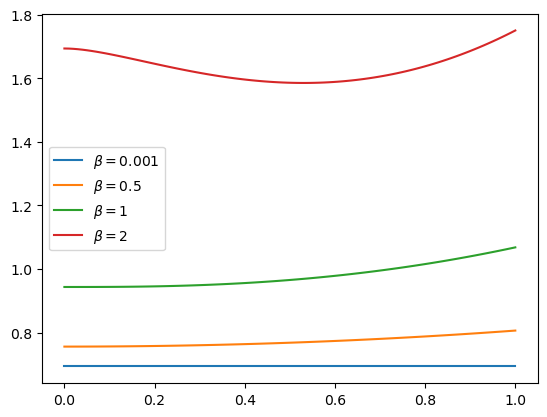

In [ ]:
import matplotlib.pyplot as plt
beta = 0
q = np.linspace(0, 1, 100)

for beta in [0.001, 0.5, 1, 2]:
    y = [minus_beta_f_RS([qq,0.], beta=beta) for qq in q]
    print(q[np.argmin(y)], np.min(y))
    plt.plot(q, y, label=r'$\beta={}$'.format(beta))
plt.legend()


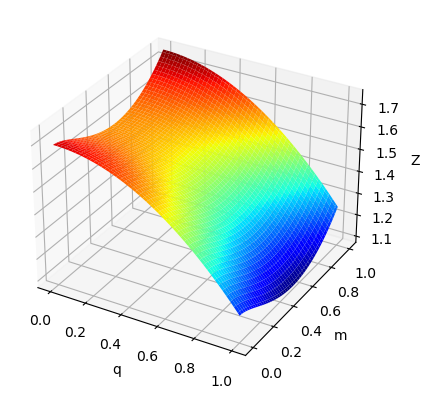

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Evaluate the function on the meshgrid
q = np.linspace(0, 1, 100)
beta=2
m = np.linspace(0, 1, 100)
Q, M = np.meshgrid(q, m)
Fe = np.zeros((100, 100))
for i, qq in enumerate(q):
    for j, mm in enumerate(m):
        Fe[i,j] = minus_beta_f_RS([qq, mm], beta=beta, j0=0, h=0)
# Create a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(Q, M, Fe, cmap='jet')

# Set the axis labels
ax.set_xlabel('q')
ax.set_ylabel('m')
ax.set_zlabel('Z')

# Show the plot
plt.show()

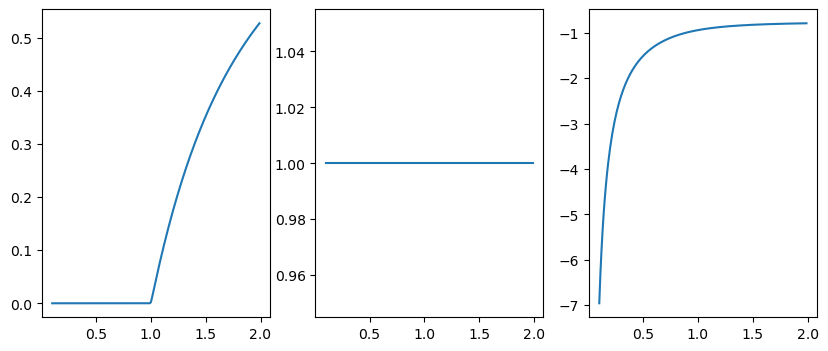

In [ ]:
from scipy.optimize import minimize
fig, axs = plt.subplots(1, 3, figsize=(10,4))
q=[]
bbs=np.arange(0.1, 2, 0.01)
fe = []
m = []
for beta in bbs:
    res = minimize(minus_beta_f_RS, [0.5,0.1], args=(beta,0.,0.), bounds=[(0,1), (0,1)], tol=1e-8)
    #print(res.x)
    q.append(res.x[0])
    m.append(res.x[1])
    fe.append(f_RS([res.x[0], 0], beta=beta, j0=0, h=0))
axs[0].plot(bbs, q)
axs[1].plot(bbs, m)
axs[2].plot(bbs, fe)

In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def int_f(ff, dx=0.01):
    x=np.arange(-10, 10, dx)
    y = ff(x)
    return np.trapz(y, x=x)

def fit(true_func, fit_func, params_true, range_=5, dx=0.1, p0=None, plot=False, log_=False):
    x = np.arange(-range_,range_,dx)
    y=[]
    if not log_: 
        for b in x:
            y.append(int_f(true_func(b, *params_true)))
    else:
        for b in x:
            y.append(np.log(int_f(true_func(b, *params_true))))
    if p0 is None:
        popt, pcov = curve_fit(fit_func, x, y, maxfev = 1000000)
    else:
        popt, pcov = curve_fit(fit_func, x, y, p0, maxfev = 1000000)
    #plt.plot(x, 1.7*np.log(np.cosh(x))+0.4)
    y_diff = np.abs(fit_func(x, *popt)- y)
    y_diff_rel = np.abs(fit_func(x, *popt)- y)/y

    if plot:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

        ax1.plot(x, fit_func(x, *popt), 'r-',
                label=f'fit: {popt}')
        ax1.plot(x, y, 'b.',
                label=f'real')
        #ax2.set_ylim(0,2)
        ax2.plot(x, y_diff,
                label='diff')
        ax3.plot(x, y_diff_rel,
                label='diff rel')
        ax1.legend()
        ax2.legend()
        ax3.legend()
        for pp in popt:
            print(f"param {pp:.2}")
    return popt, pcov, y_diff, y_diff_rel

def plot_curve(true_func, params_true, range=5, dx=0.1):
    fig, ax1 = plt.subplots(1, 1, figsize=(8,5))
    x = np.arange(-range,range,dx)
    y=[]
    for b in x:
        y.append(int_f(true_func(b, *params_true)))
    #plt.plot(x, 1.7*np.log(np.cosh(x))+0.4)
    ax1.plot(x, y, 'b.',
            label=f'real')
def plot_fit(fit_funct, params, range=5, dx=0.1):
    fig, ax1 = plt.subplots(1, 1, figsize=(8,5))
    x = np.arange(-range,range,dx)
    y=[]
    for b in x:
        y.append(fit_funct(b, *params))
    #plt.plot(x, 1.7*np.log(np.cosh(x))+0.4)
    ax1.plot(x, y, 'b.',
            label=f'fit_func')




In [ ]:
from scipy.special import log_expit, expit

#funct_int = lambda x: np.log(np.cosh(x))
funct_int = lambda x: log_expit(x)

def f_rs(h, q0=1, beta=1, JJ=0.01):
    def f_(x):
        return 1/np.sqrt(2*np.pi*q0) * np.exp(-((x)**2)/q0) * funct_int(beta*(JJ+beta*x+h))
    return f_

def f_rs_approx(x, a, b, c, d):
    return a + b * funct_int(c*x+d)
#def f_rs_approx1(x, b, c, d):
#    return b * funct_int(c*x+d)

#funct_int = lambda x: np.log(np.cosh(x))
funct_int = lambda x: log_expit(x)

def f_10rsb(h, q0=1, beta=1, JJ=0.01, m=1, a=-1):
    def f_(x):
        return 1/np.sqrt(2*np.pi*q0) * np.exp(-((x)**2)/q0 + m*beta*beta*x - m * funct_int(2*beta*(JJ+beta*x+h)))
    return f_

def f_1rsb(h, q0=0.5, q1=0.6,  beta=1, JJ=0.01, m=1, a=-1):
    def f_(x):
        return 1/np.sqrt(2*np.pi*q0) * np.exp(-((x)**2)/q0) * np.log(int_f(f_10rsb(h+x, q0=min(q1-q0,0.9999), beta=beta, JJ=JJ, m=m)))
    return f_

def f_10rsb_approx(x, b0, w0, b1, w1, b2, w2):
    return b0 + w0 * log_expit(b1 + w1 * log_expit(w2*x+b2))


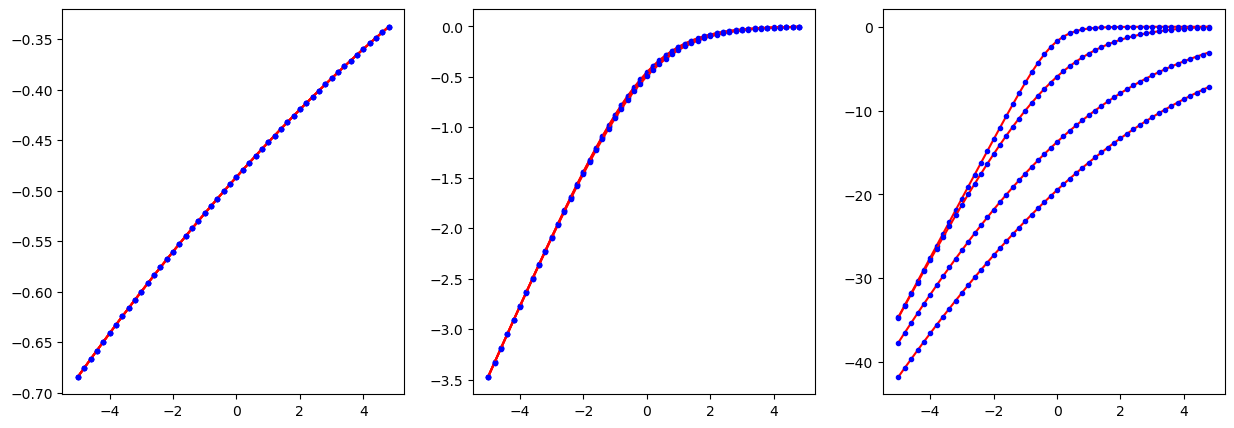

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

q0=0.01
JJ=0.1
beta=1
true_func = f_rs
fit_func = f_rs_approx
range_=5
dx=0.2
x = np.arange(-range_,range_,dx)
for i, beta in enumerate([0.1, 1, 10]):
        for ii, q0 in enumerate([0.01, 0.1, 0.5 ,0.99]):
                params_true = [q0,beta,JJ]
                popt, pcov, y_diff, y_diff_rel = fit(true_func, fit_func, params_true, p0=[0.1, q0,beta,JJ], plot=False, range_=range_, dx=dx)
                y=[]
                for b in x:
                        y.append(int_f(true_func(b, *params_true)))

                axs[i].plot(x, fit_func(x, *popt), 'r-',
                        label=f'fit: {popt}')
                axs[i].plot(x, y, 'b.',
                        label=f'real')
# #ax2.set_ylim(0,2)
# ax2.plot(x, y_diff,
#         label='diff')
# ax3.plot(x, y_diff_rel,
#         label='diff rel')
# ax1.legend()
# ax2.legend()
# ax3.legend()


In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

q0=0.01
JJ=0.1
beta=1
m=0.5
true_func = f_1rsb
fit_func = f_10rsb
range_=5
dx=0.2
x = np.arange(-range_,range_,dx)
for i, beta in enumerate([0.1, 1, 10]):
        for ii, q0 in enumerate([0.01, 0.1, 0.5 ,0.99]):
                params_true = [q0,q0+0.5, beta, JJ, m]
                #popt, pcov, y_diff, y_diff_rel = fit(true_func, fit_func, params_true, plot=False, range_=range_, dx=dx)
                y=[]
                for b in x:
                        y.append(int_f(true_func(b, *params_true)))

                #axs[i].plot(x, fit_func(x, *popt), 'r-',
                #        label=f'fit: {popt}')
                axs[i].plot(x, y, 'b.',
                        label=f'real')
# #ax2.set_ylim(0,2)
# ax2.plot(x, y_diff,
#         label='diff')
# ax3.plot(x, y_diff_rel,
#         label='diff rel')
# ax1.legend()
# ax2.legend()
# ax3.legend()


NameError: name 'plt' is not defined

In [ ]:
log_expit(0)

-0.6931471805599453

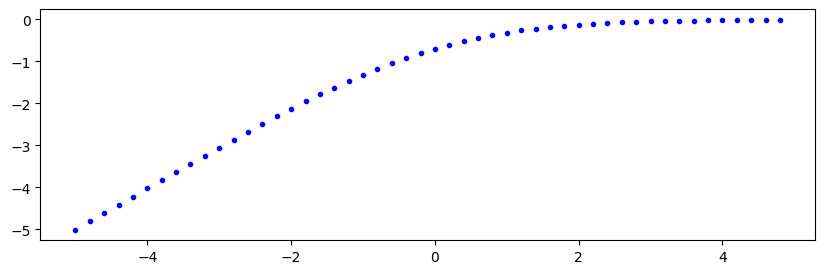

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(10,3))
x = np.arange(-range_,range_,dx)
y = log_expit(x)
axs.plot(x, y, 'b.',)

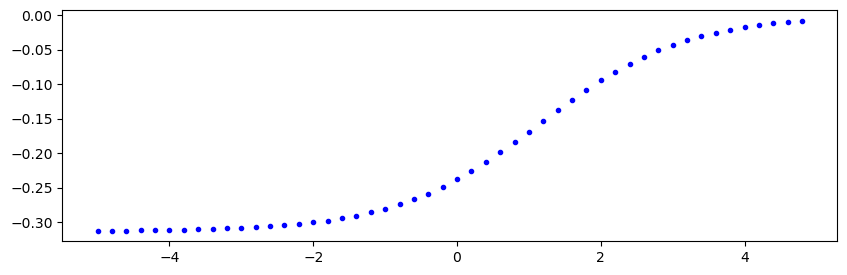

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(10,3))
x = np.arange(-range_,range_,dx)
b0 = 1
w0=-1
b1=1
w1=-1

y = log_expit(b0+w0*log_expit(b1+w1*x))
axs.plot(x, y, 'b.',)

/var/folders/jy/gjfds_4d4xsfqkq02klzlj240000gn/T/ipykernel_95054/3904478306.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, len(ms), figsize=(10,3))
/var/folders/jy/gjfds_4d4xsfqkq02klzlj240000gn/T/ipykernel_95054/1943990698.py:21: RuntimeWarning: overflow encountered in exp
  return 1/np.sqrt(2*np.pi*q0) * np.exp(-((x)**2)/q0 + a*beta*beta*x - m * funct_int(2*beta*(JJ+beta*x+h)))


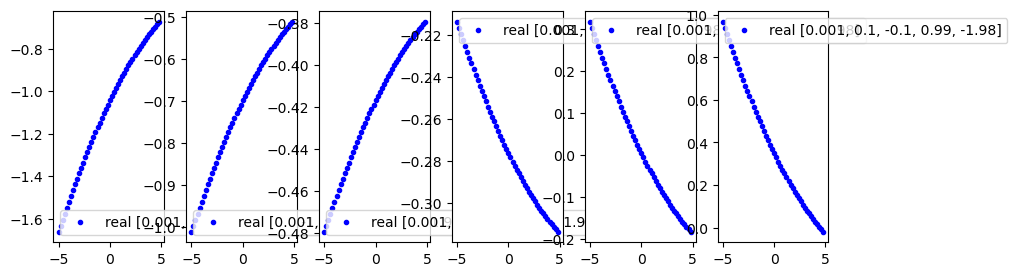

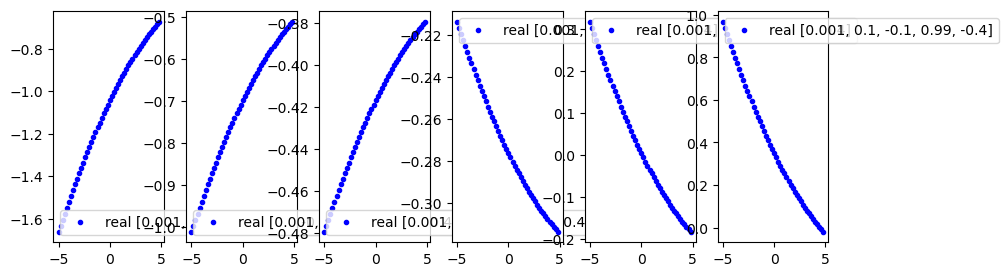

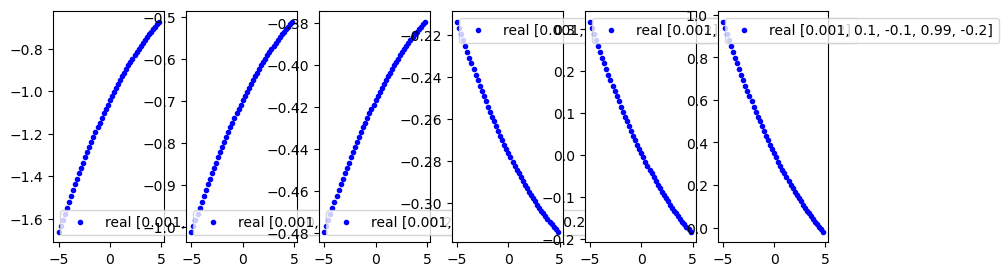

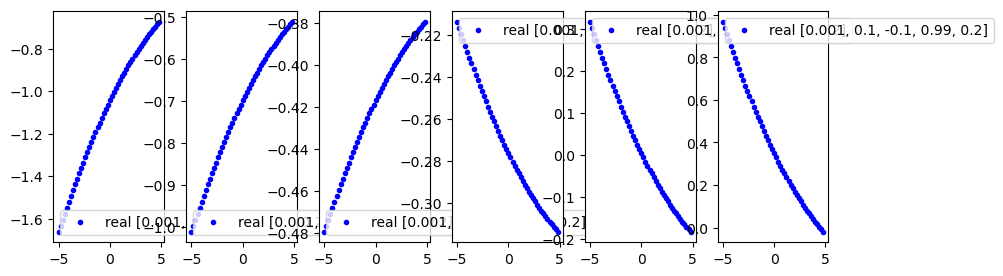

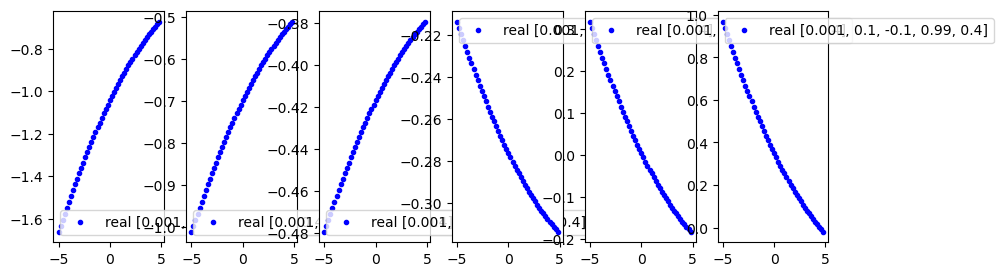

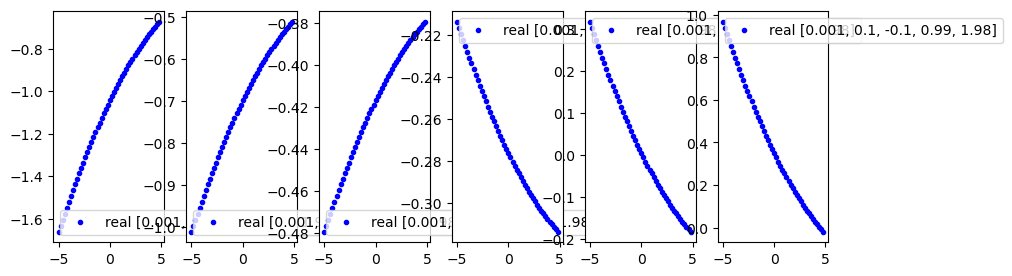

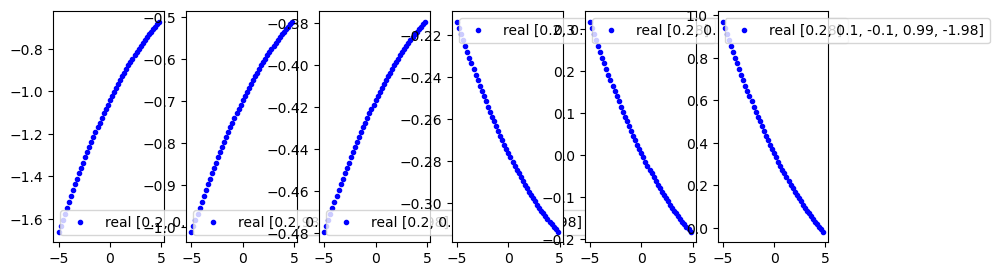

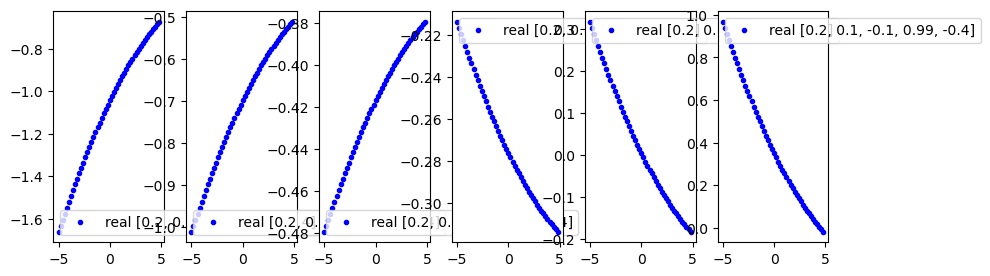

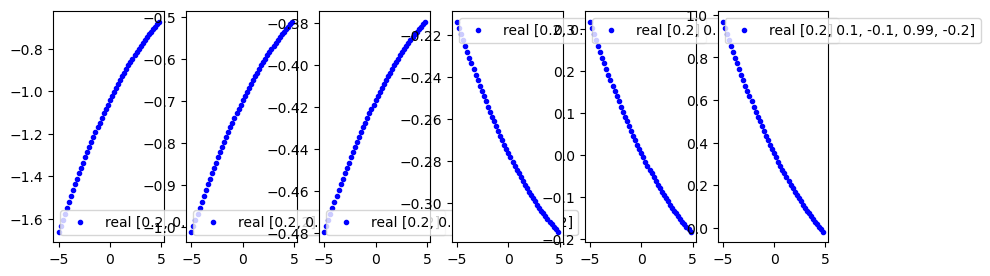

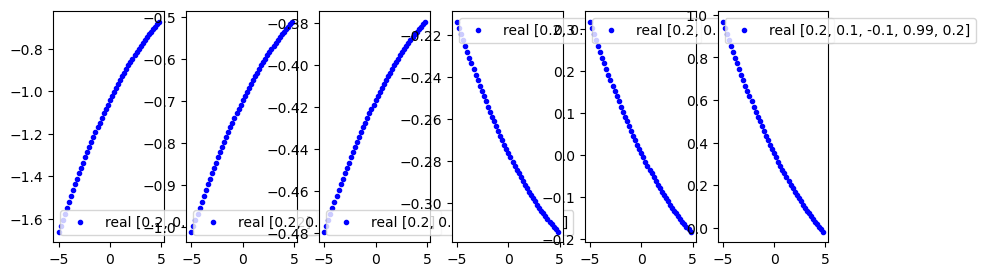

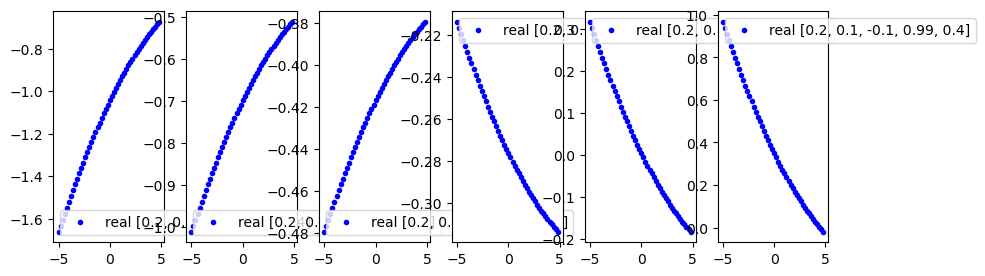

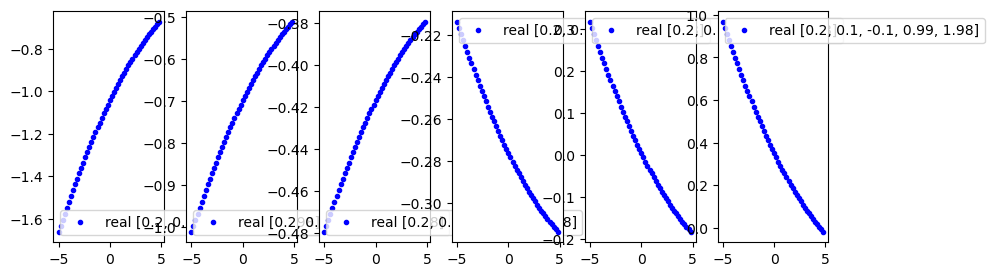

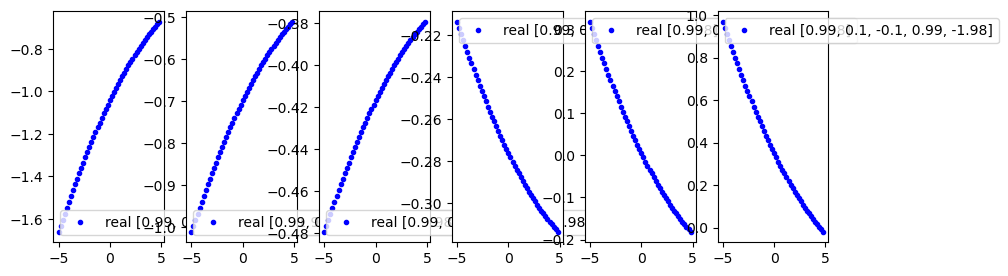

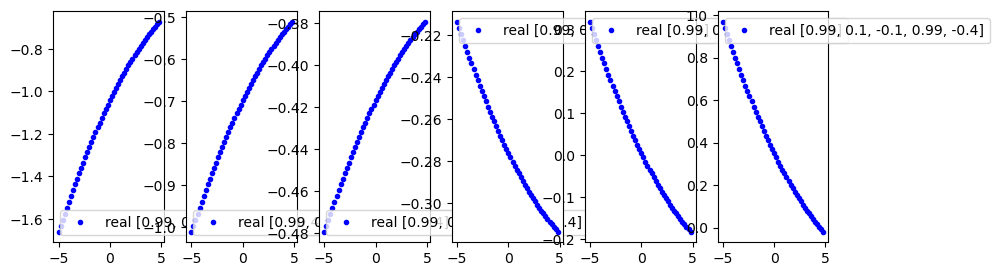

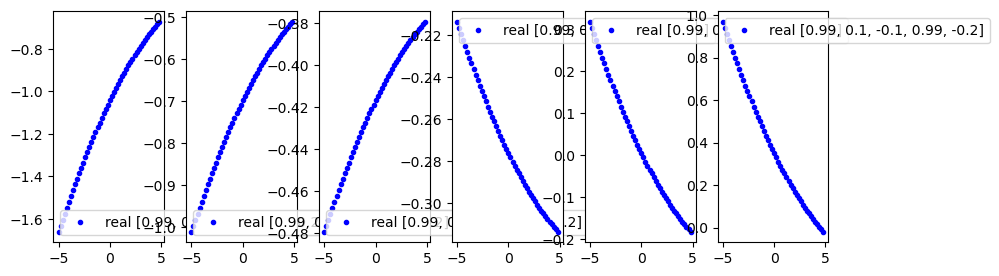

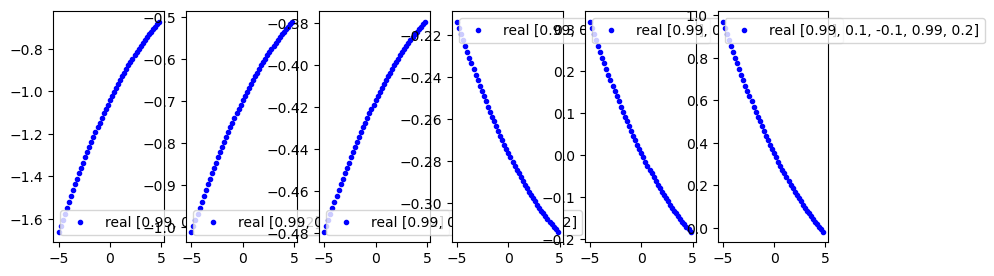

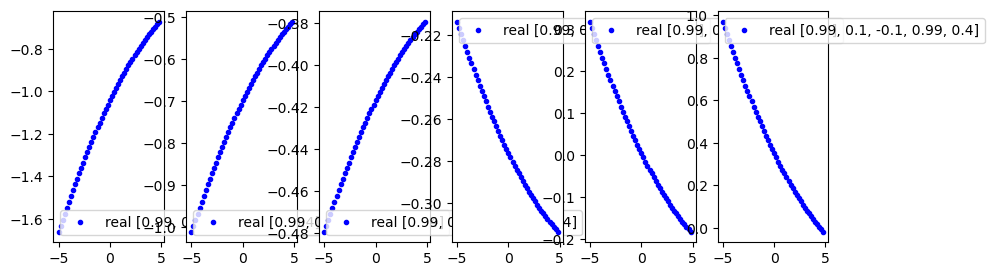

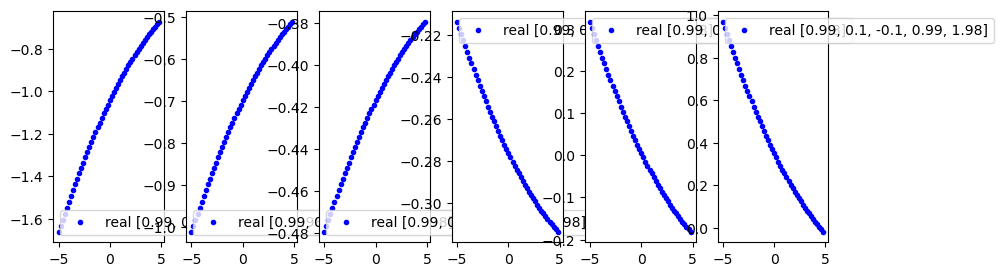

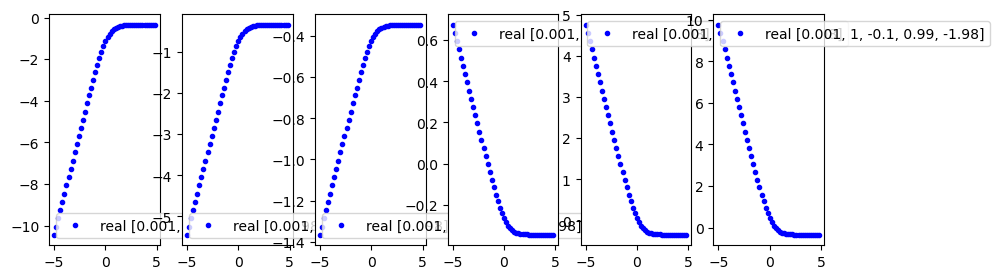

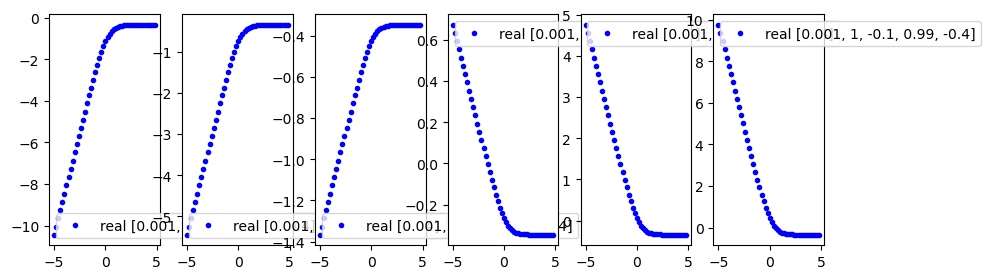

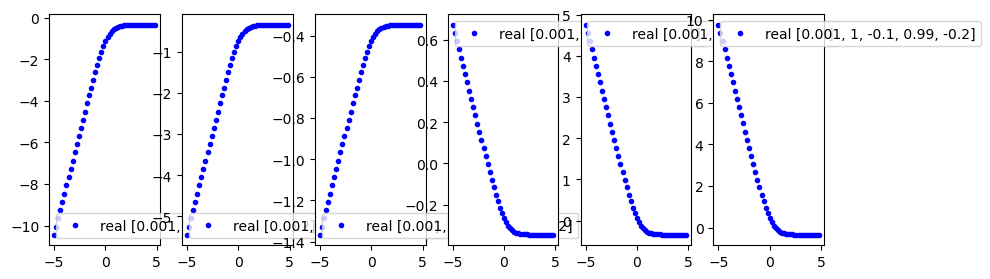

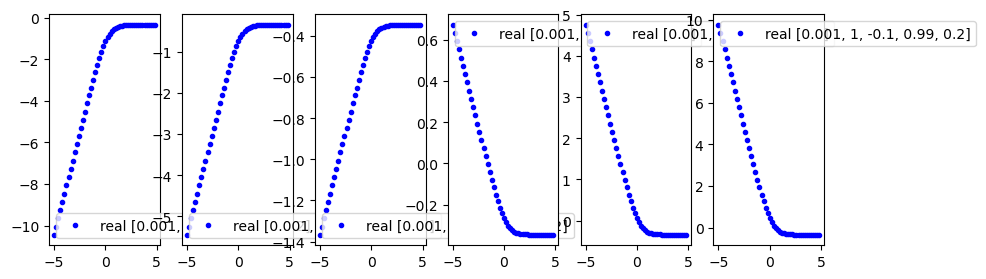

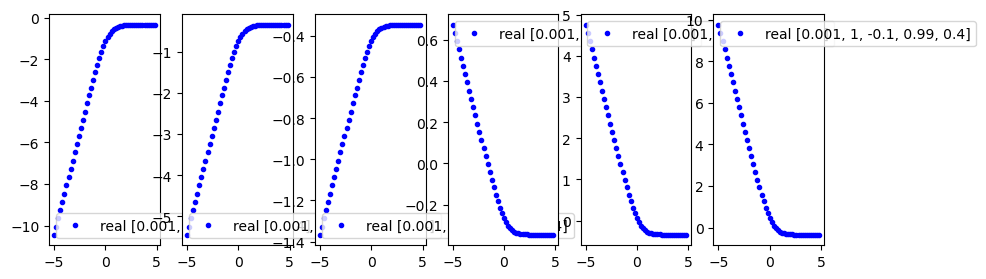

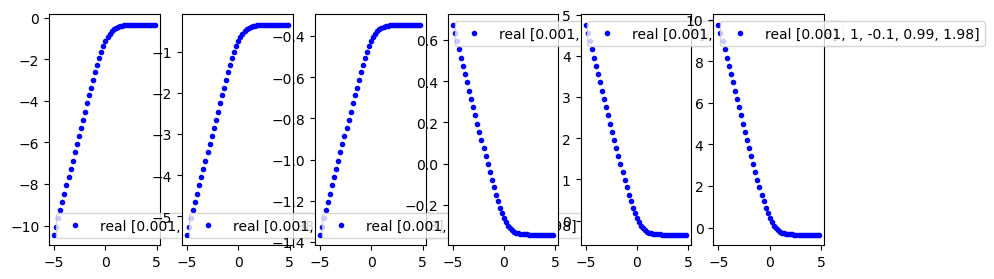

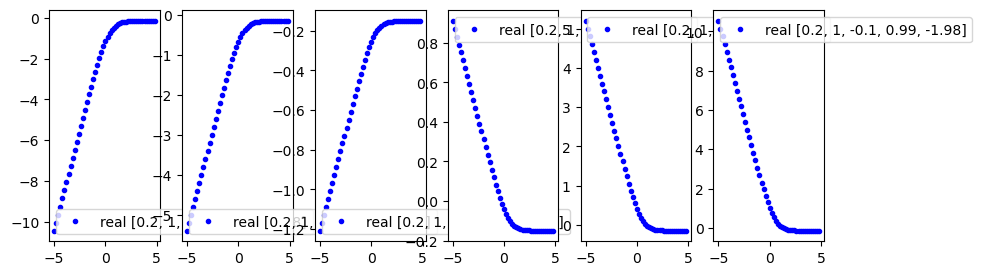

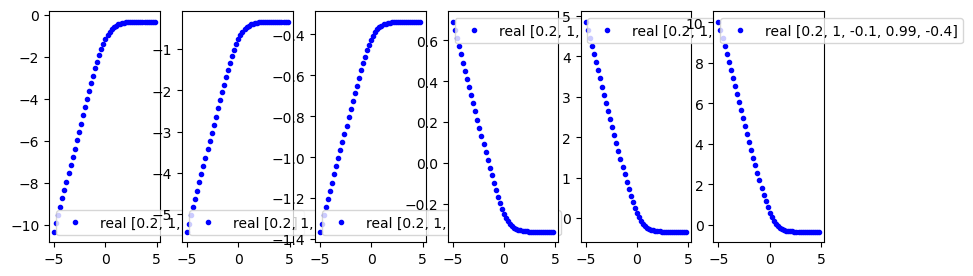

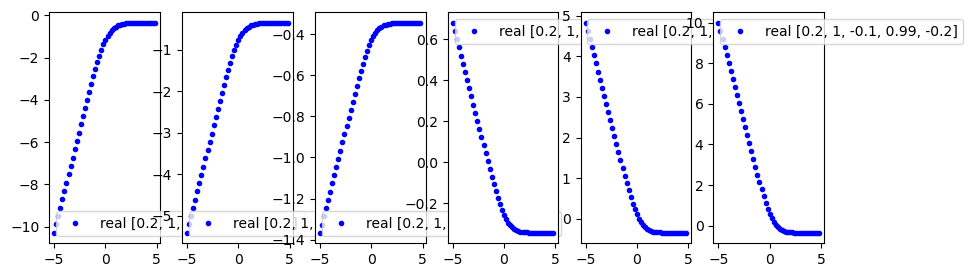

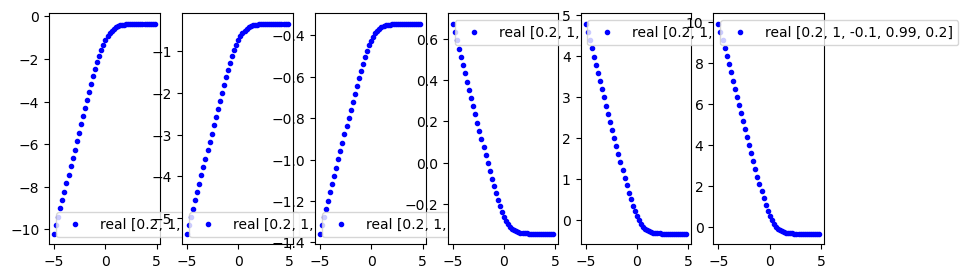

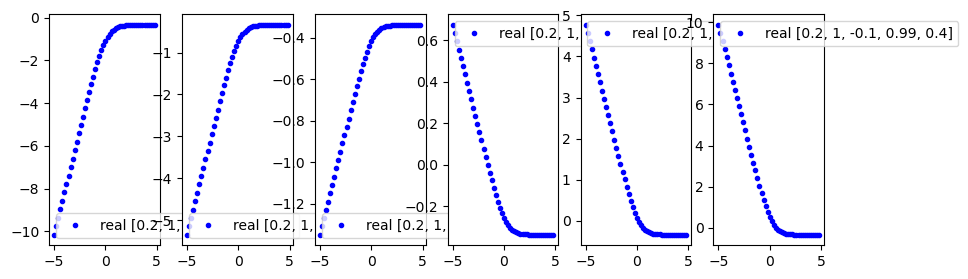

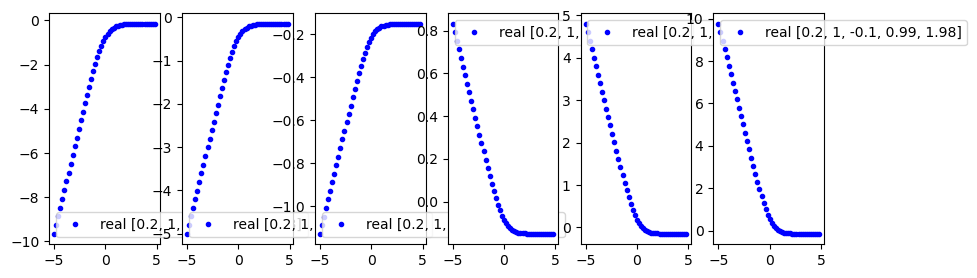

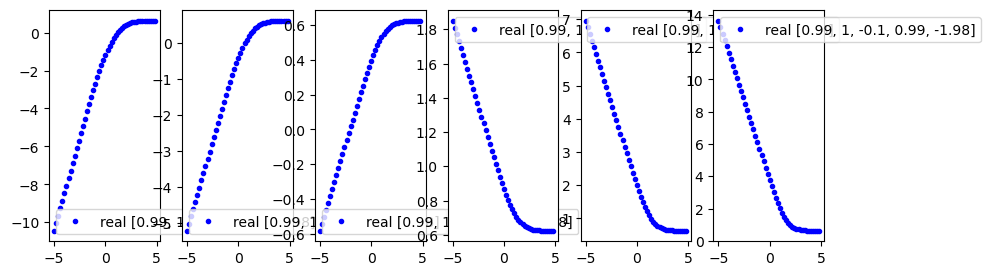

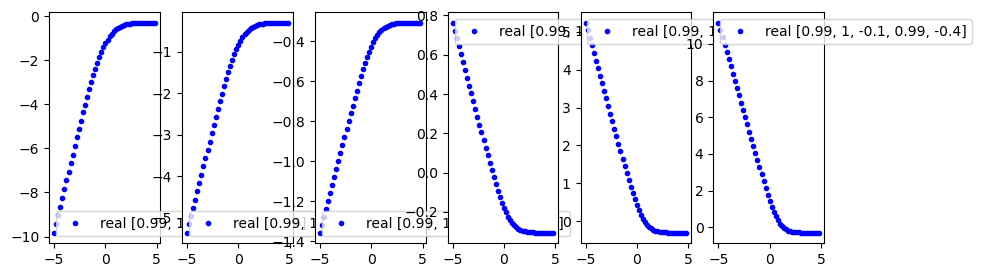

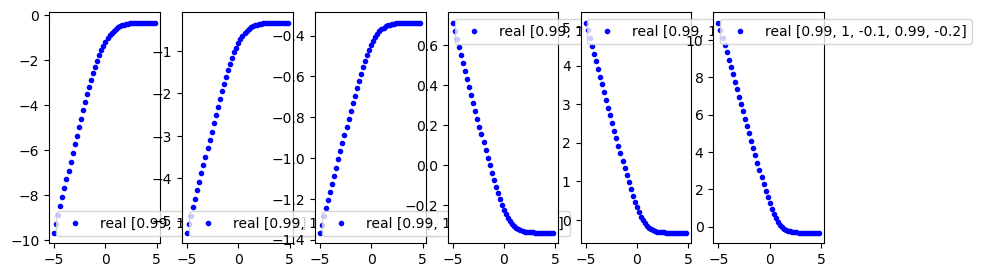

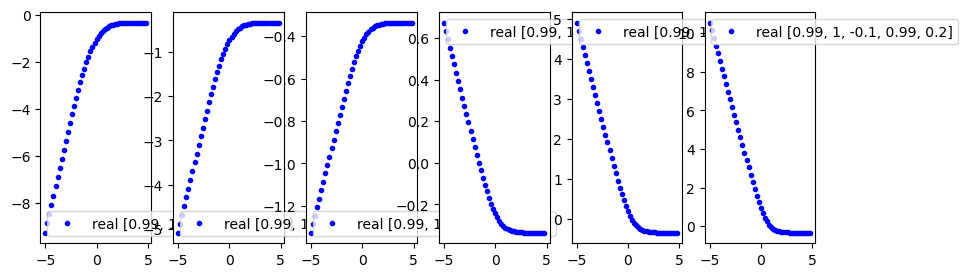

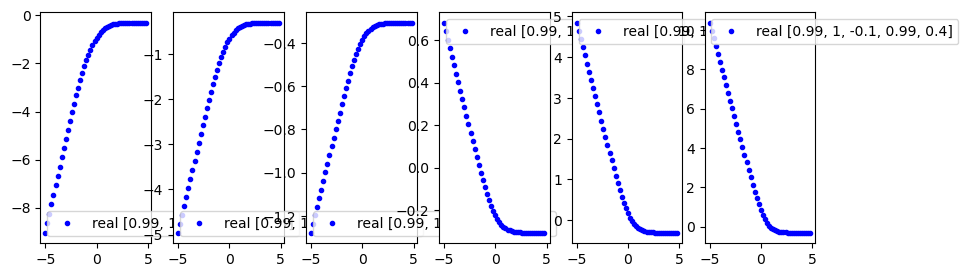

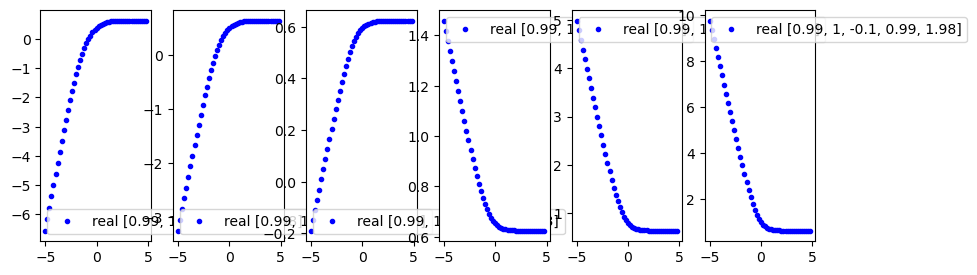

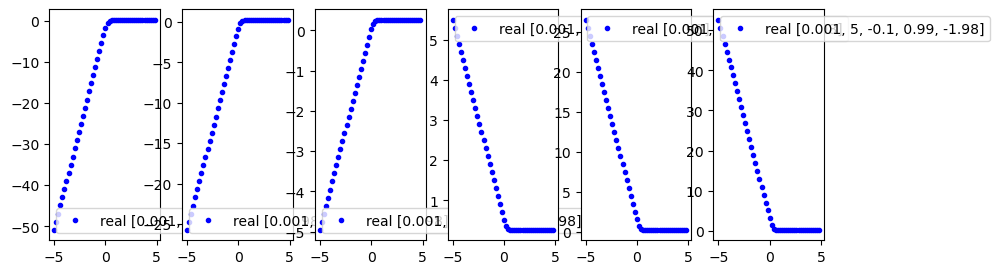

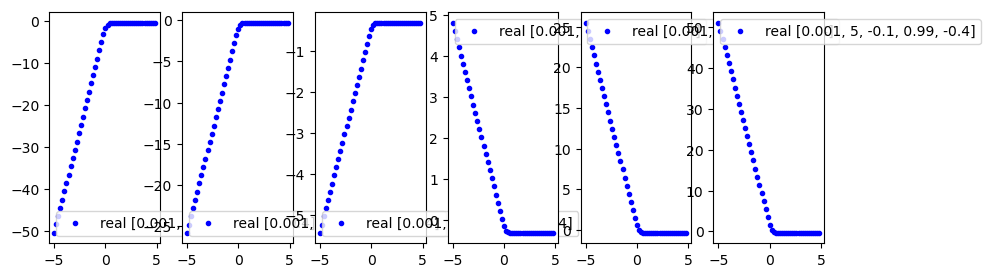

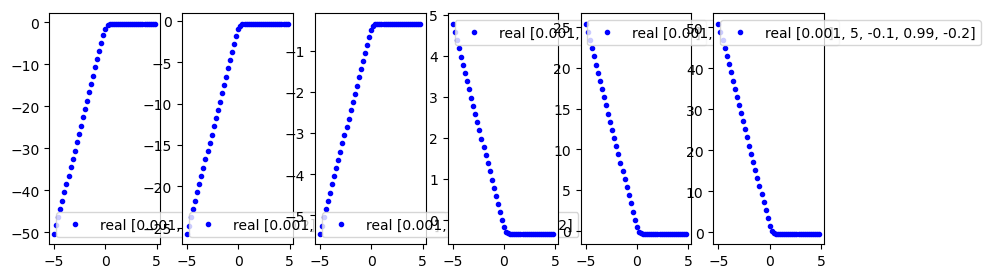

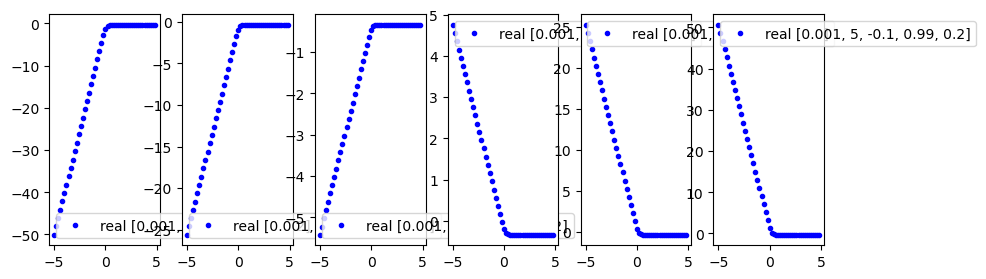

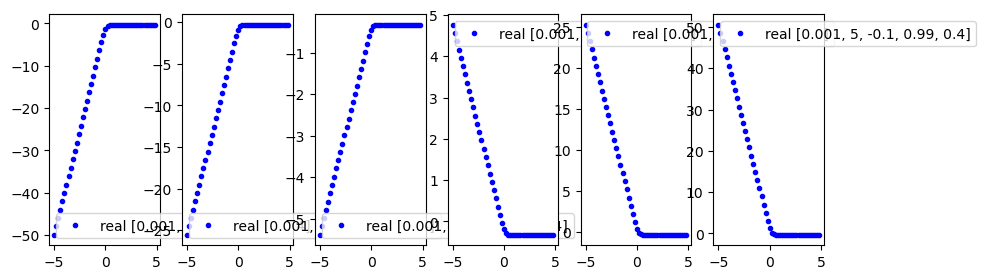

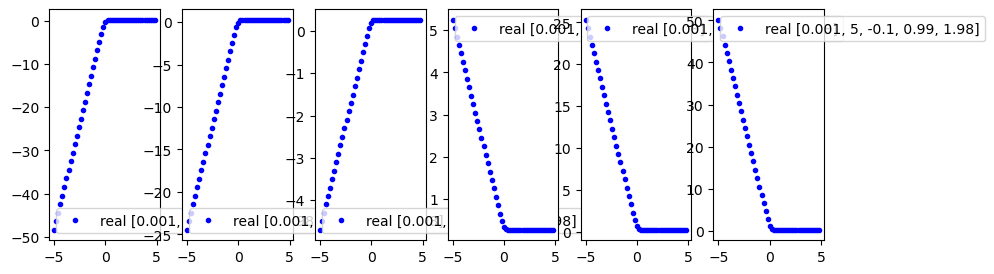

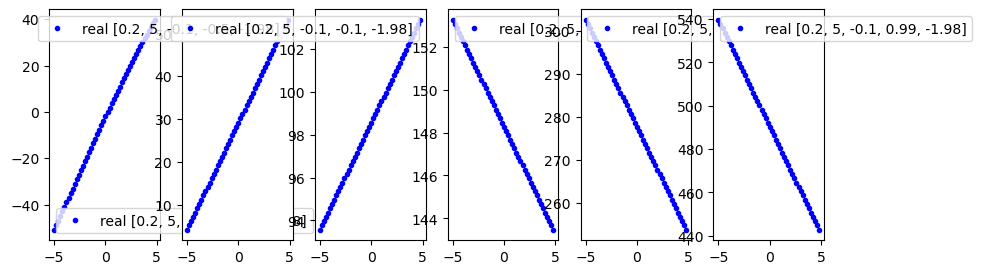

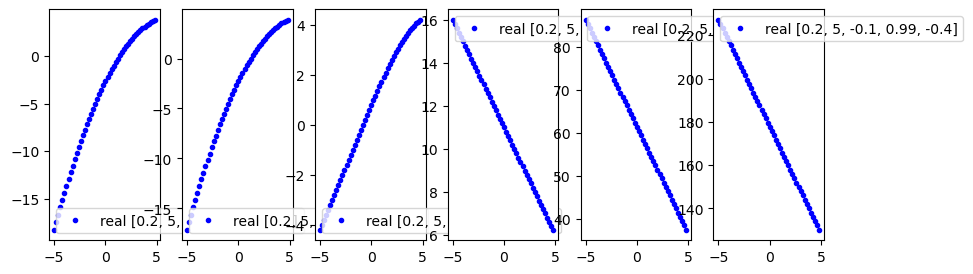

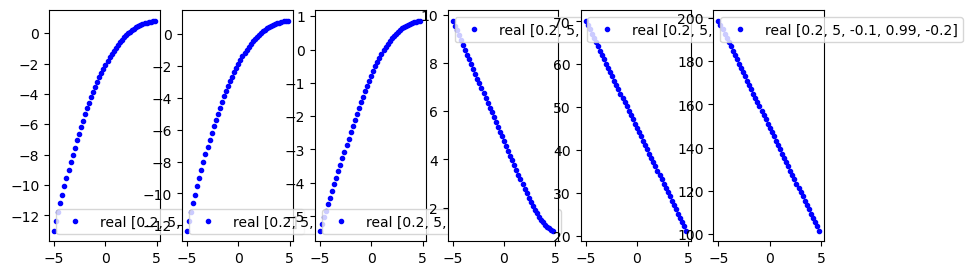

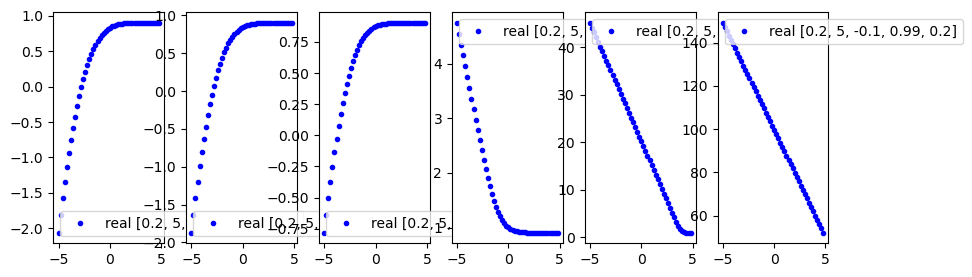

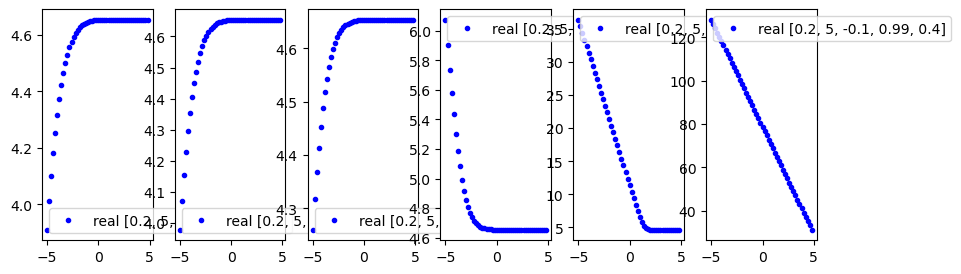

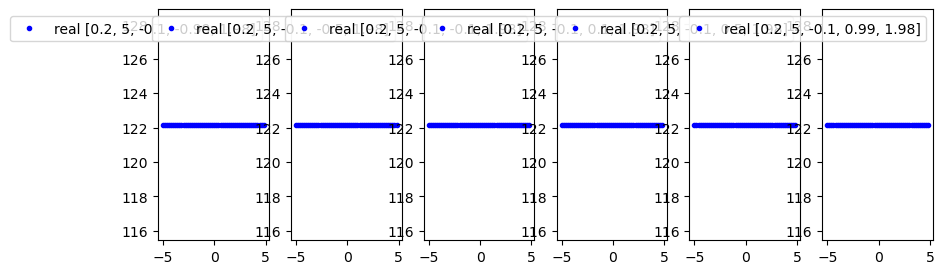

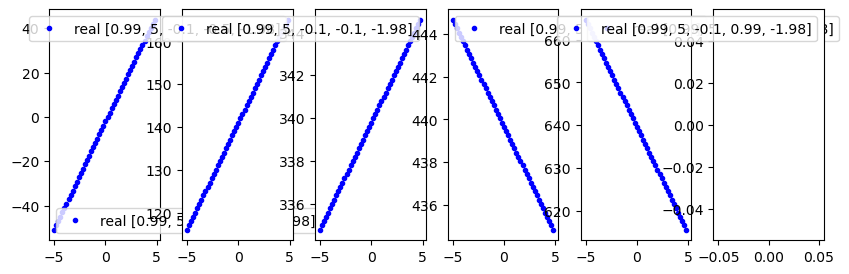

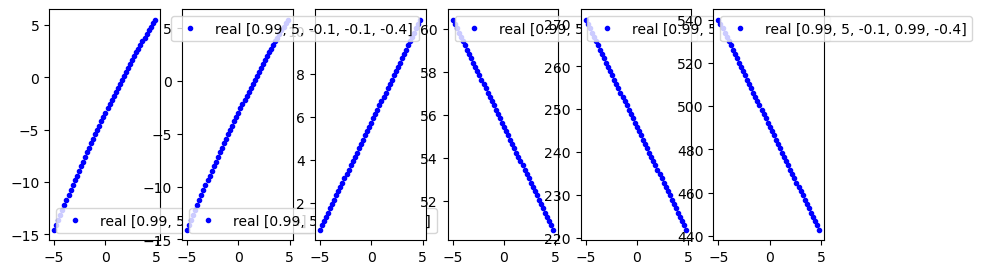

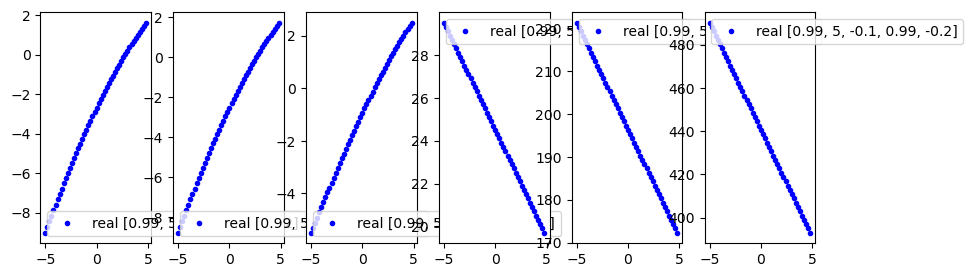

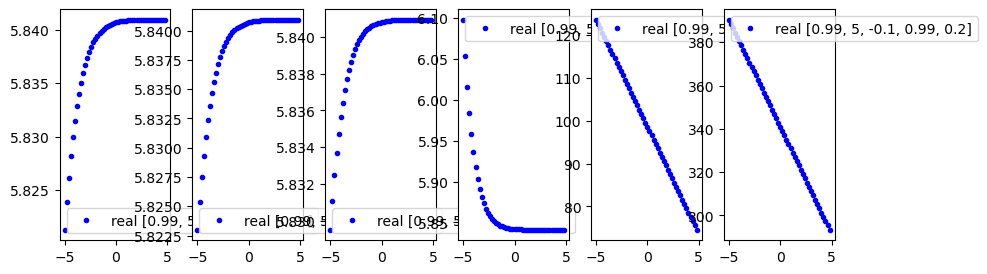

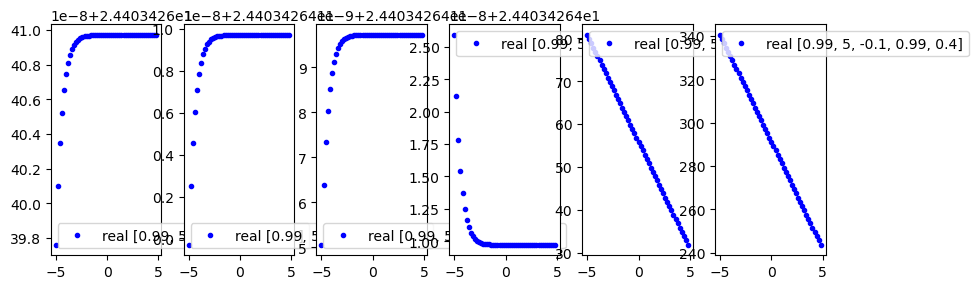

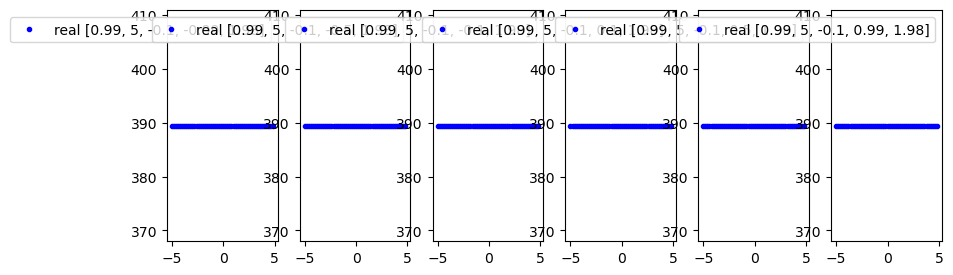

In [ ]:
#fig, axs = plt.subplots(1, 3, figsize=(15,5))

#q0=0.4
JJ=-0.1
#beta=1
m=-0.001
true_func = f_10rsb
fit_func = f_10rsb_approx
range_=5
dx=0.2
log_=True
a=0.1
x = np.arange(-range_,range_,dx)
ms = [-0.99,-0.5, -0.1,0.1, 0.5, 0.99]
for ii, beta in enumerate([0.1, 1, 5]):
        for iii, q0 in enumerate([0.001,0.2,0.99]):
                for iiii, a in enumerate([-0.99, -0.2, -0.1, 0.1,0.2,0.99]):
                        fig, axs = plt.subplots(1, len(ms), figsize=(10,3))
                        for i, m in enumerate(ms):
                                params_true = [q0,beta,JJ, m, 2*a]
                                #print(params_true)
                                # popt, pcov, y_diff, y_diff_rel = fit(true_func, fit_func, params_true, 
                                # #p0=[q0,beta,JJ, m, a],
                                # plot=False, range_=range_, dx=dx, log_=log_)
                                y=[]
                                if not log_: 
                                        for b in x:
                                                y.append(int_f(true_func(b, *params_true)))
                                else:
                                        for b in x:
                                                y.append(np.log(int_f(true_func(b, *params_true))))

                                # axs[i].plot(x, fit_func(x, *popt), 'r-',
                                #         label=f'fit: {popt}')
                                axs[i].plot(x, y, 'b.',
                                        label=f'real {params_true}')
                                axs[i].legend()
# #ax2.set_ylim(0,2)
# ax2.plot(x, y_diff,
#         label='diff')
# ax3.plot(x, y_diff_rel,
#         label='diff rel')
# ax1.legend()
# ax2.legend()
# ax3.legend()


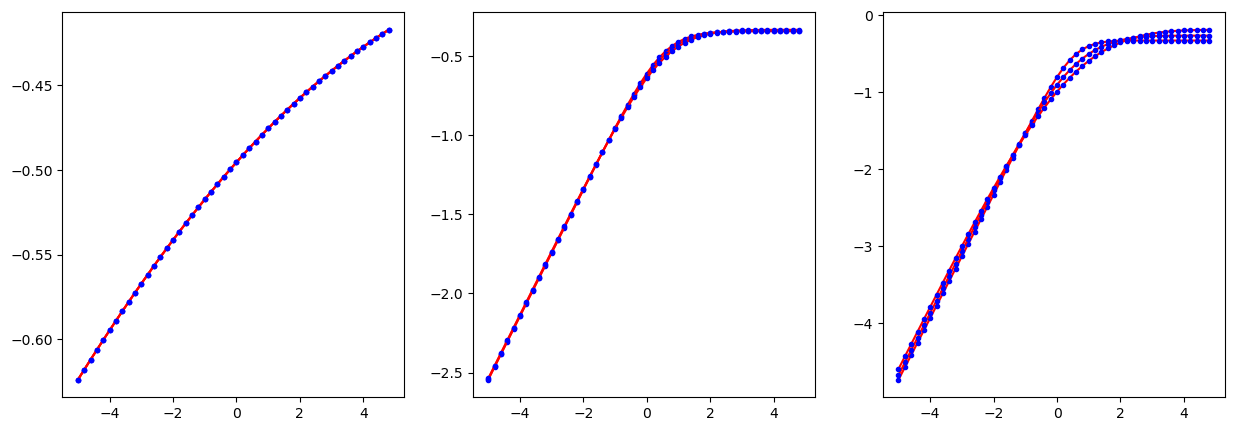

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

#q0=0.4
JJ=-0.5
beta=1
m=-0.2
true_func = f_10rsb
fit_func = f_10rsb_approx
range_=5
dx=0.2
log_=True
x = np.arange(-range_,range_,dx)
for i, beta in enumerate([0.1, 1, 2]):
        for ii, q0 in enumerate([0.1, 0.5 ,0.99]):
                        params_true = [q0,beta,JJ, m]
                        popt, pcov, y_diff, y_diff_rel = fit(true_func, fit_func, params_true, 
                        #p0=[q0,beta,JJ, m, a],
                        plot=False, range_=range_, dx=dx, log_=log_)
                        y=[]
                        if not log_: 
                                for b in x:
                                        y.append(int_f(true_func(b, *params_true)))
                        else:
                                for b in x:
                                        y.append(np.log(int_f(true_func(b, *params_true))))

                        axs[i].plot(x, fit_func(x, *popt), 'r-',
                                label=f'fit: {popt}')
                        axs[i].plot(x, y, 'b.',
                                label=f'real')
# #ax2.set_ylim(0,2)
# ax2.plot(x, y_diff,
#         label='diff')
# ax3.plot(x, y_diff_rel,
#         label='diff rel')
# ax1.legend()
# ax2.legend()
# ax3.legend()


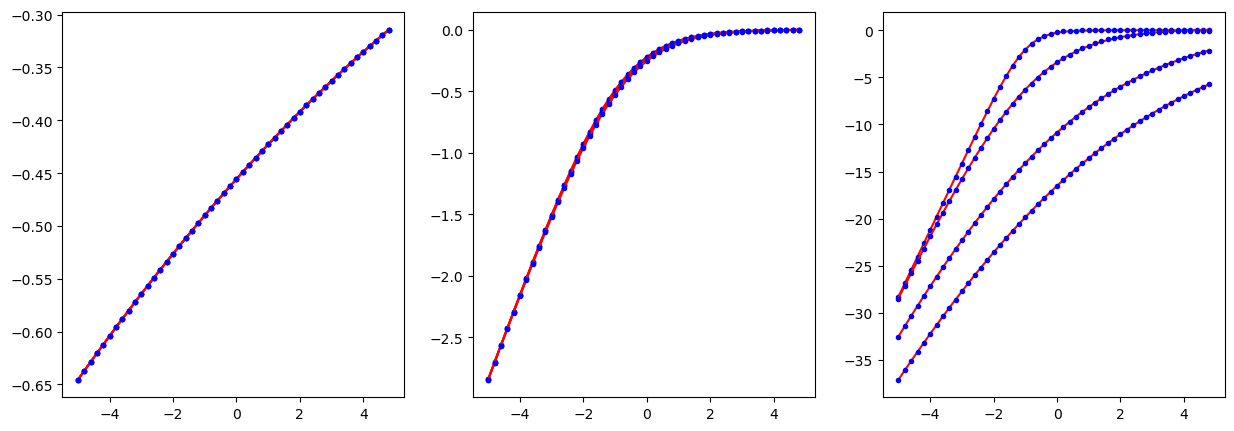

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

q0=0.01
JJ=1
beta=1
true_func = f_rs
fit_func = f_rs_approx
range=5
dx=0.2
x = np.arange(-range,range,dx)
for i, beta in enumerate([0.1, 1, 10]):
        for ii, q0 in enumerate([0.01, 0.1, 0.5 ,0.99]):
                params_true = [q0,beta,JJ]
                popt, pcov, y_diff, y_diff_rel = fit(true_func, fit_func, params_true, p0=[0.1, q0,beta,JJ], plot=False, range=range, dx=dx)
                y=[]
                for b in x:
                        y.append(int_f(true_func(b, *params_true)))

                axs[i].plot(x, fit_func(x, *popt), 'r-',
                        label=f'fit: {popt}')
                axs[i].plot(x, y, 'b.',
                        label=f'real')
# #ax2.set_ylim(0,2)
# ax2.plot(x, y_diff,
#         label='diff')
# ax3.plot(x, y_diff_rel,
#         label='diff rel')
# ax1.legend()
# ax2.legend()
# ax3.legend()


beta 0.1
param 1.6e-08
param 0.71
param 0.1
param 0.01
beta 0.1
param 1.7e-07
param 0.71
param 0.1
param 0.01
beta 0.1
param 5e-07
param 0.71
param 0.1
param 0.01
beta 0.1
param 8.3e-07
param 0.71
param 0.1
param 0.01
beta 0.1
param 1.2e-06
param 0.71
param 0.1
param 0.01
beta 0.1
param 1.6e-06
param 0.71
param 0.1
param 0.01
beta 1
param 4.1e-05
param 0.71
param 1.0
param 0.1
beta 1
param 0.00041
param 0.71
param 0.99
param 0.1
beta 1
param 0.0012
param 0.73
param 0.97
param 0.099
beta 1
param 0.002
param 0.74
param 0.95
param 0.099
beta 1
param 0.0028
param 0.76
param 0.94
param 0.098
beta 1
param 0.004
param 0.77
param 0.92
param 0.098
beta 2
param 0.00021
param 0.72
param 2.0
param 0.2
beta 2
param 0.0021
param 0.8
param 1.8
param 0.18
beta 2
param 0.0061
param 0.97
param 1.5
param 0.16
beta 2
param 0.01
param 1.1
param 1.3
param 0.15
beta 2
param 0.015
param 1.2
param 1.2
param 0.14
beta 2
param 0.021
param 1.4
param 1.0
param 0.12


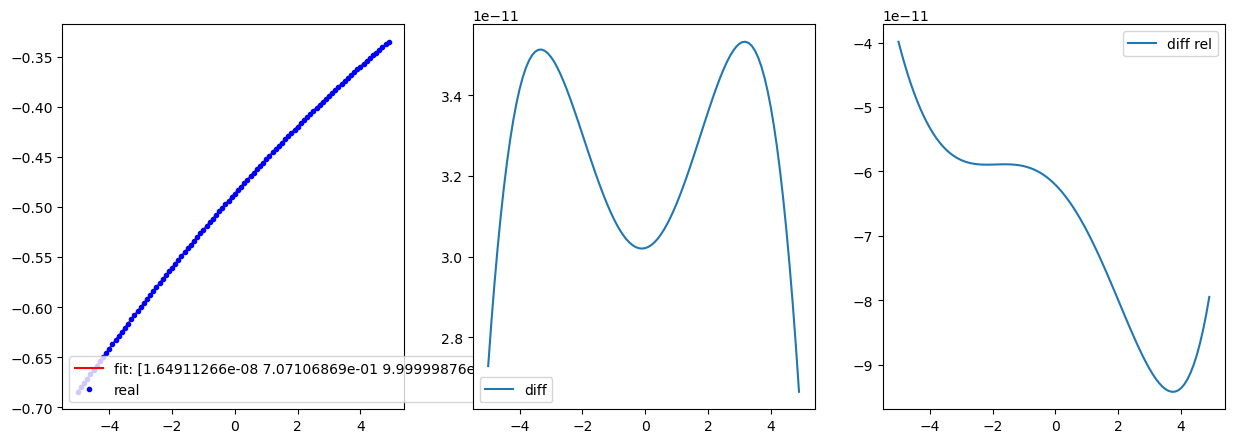

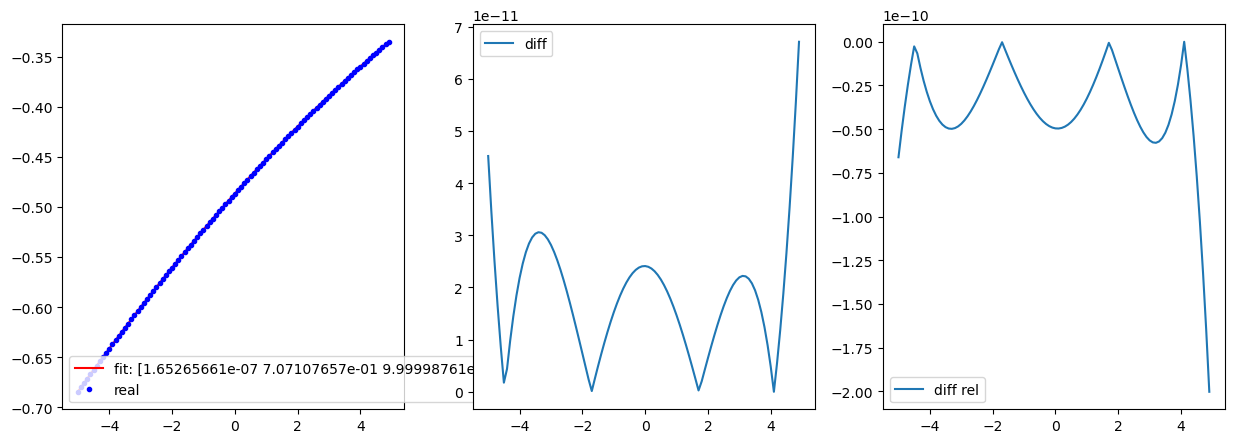

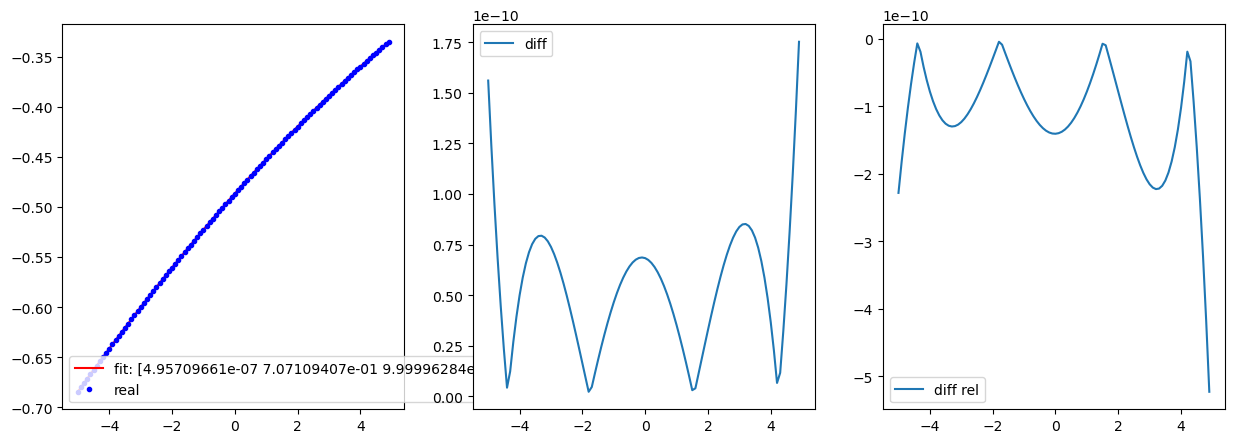

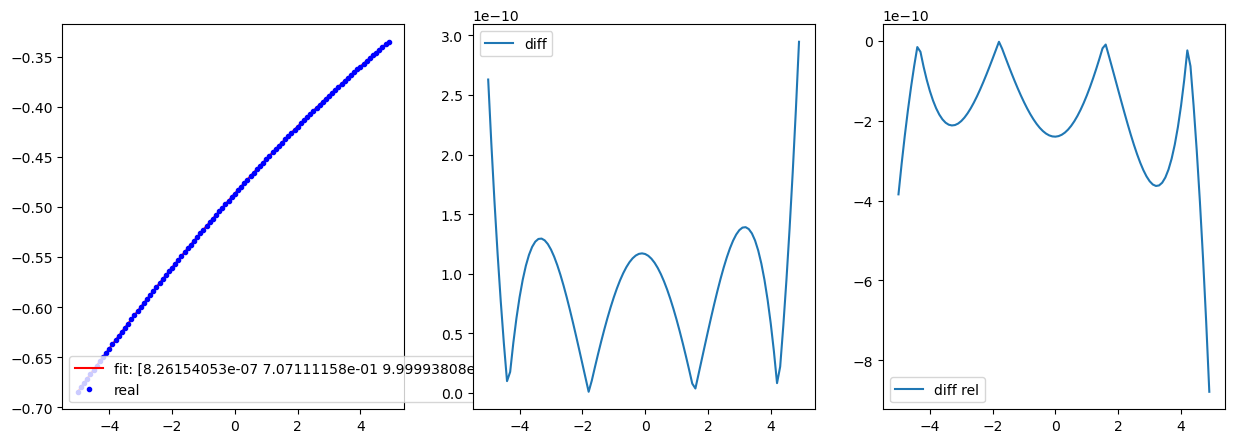

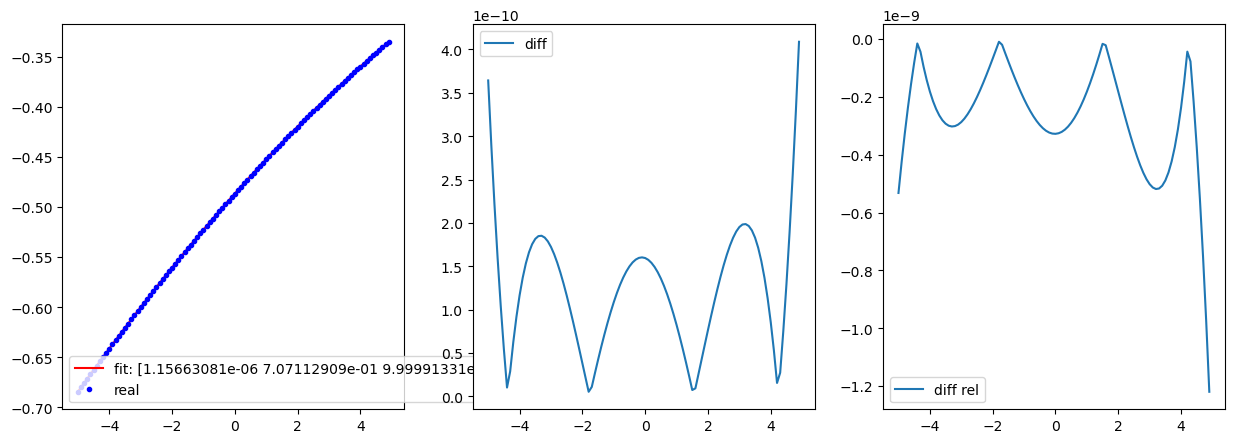

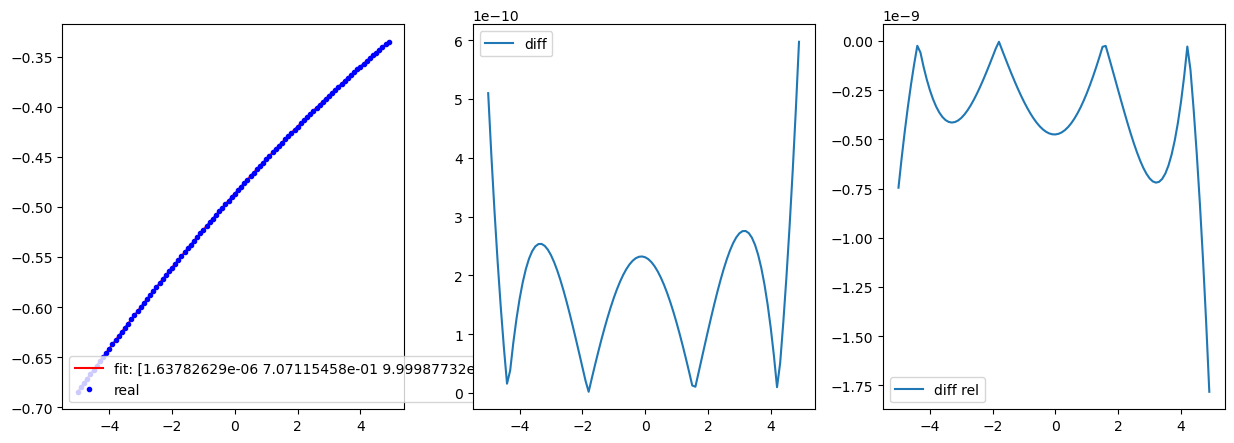

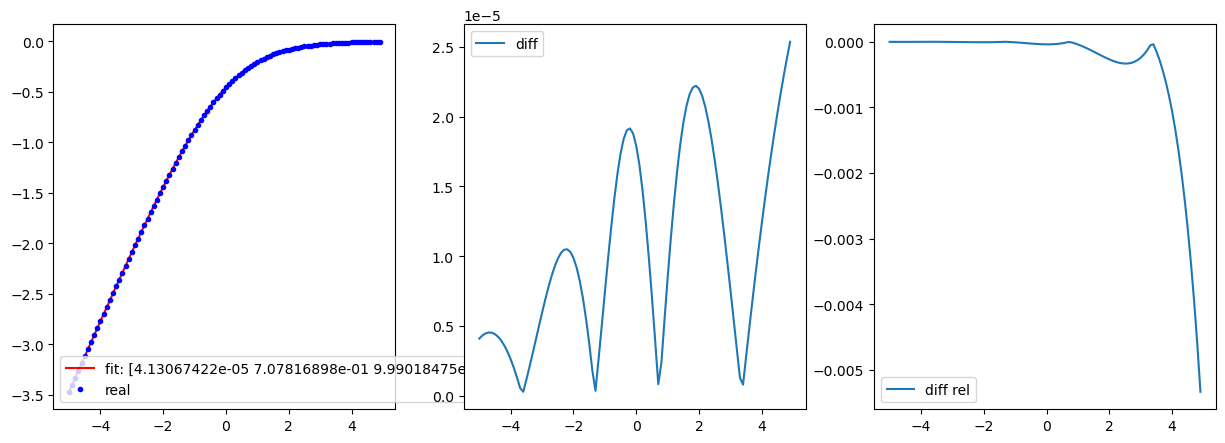

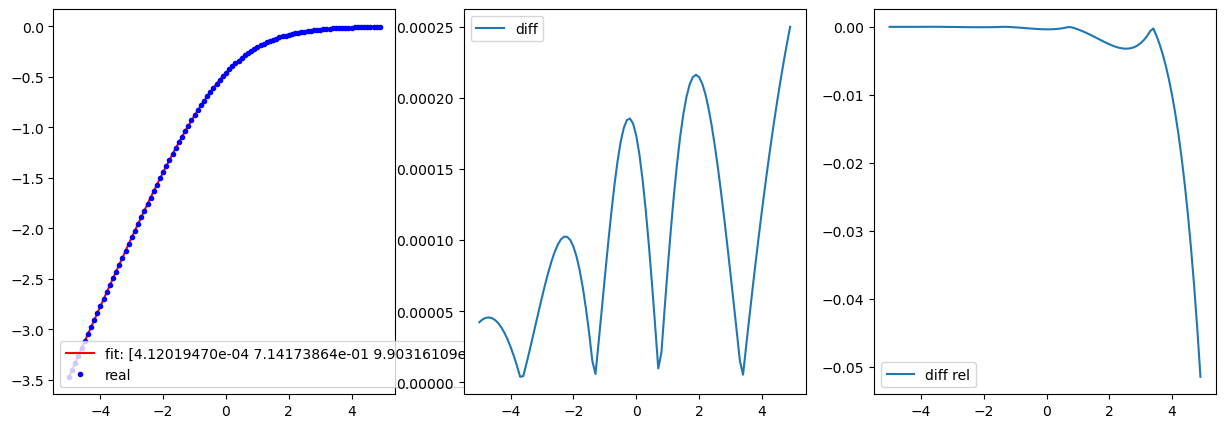

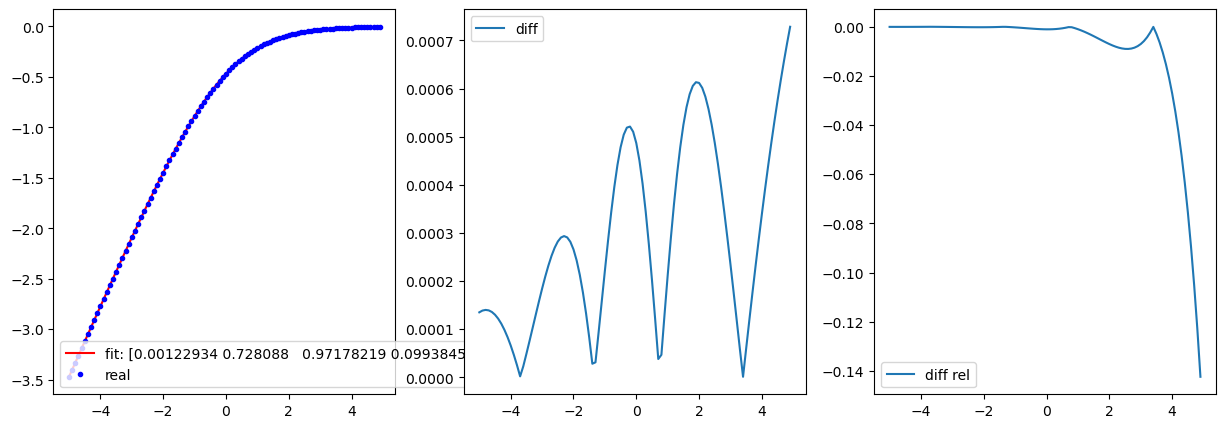

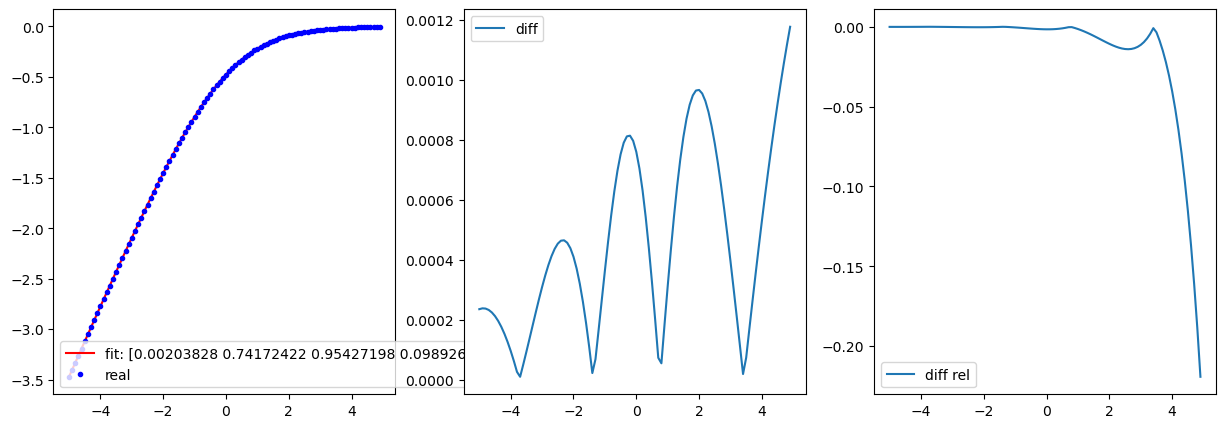

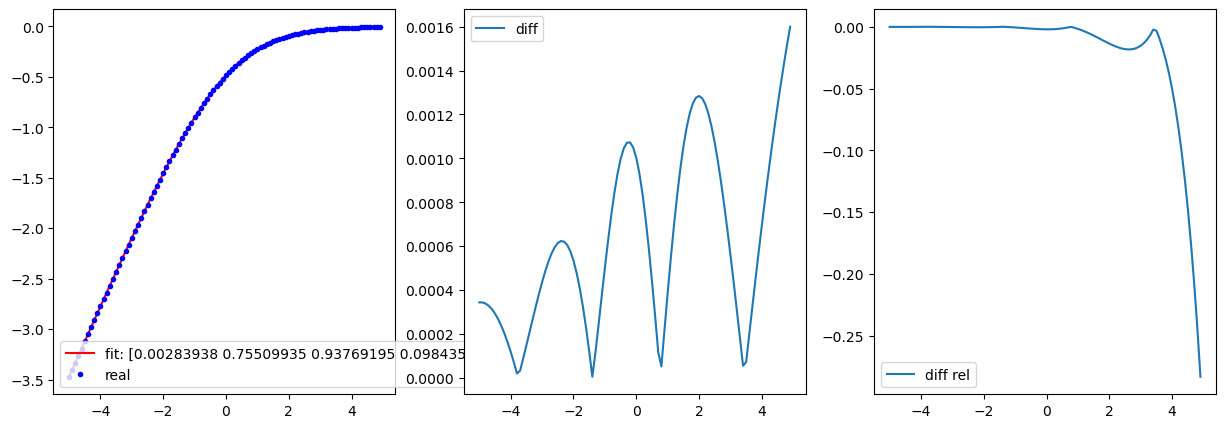

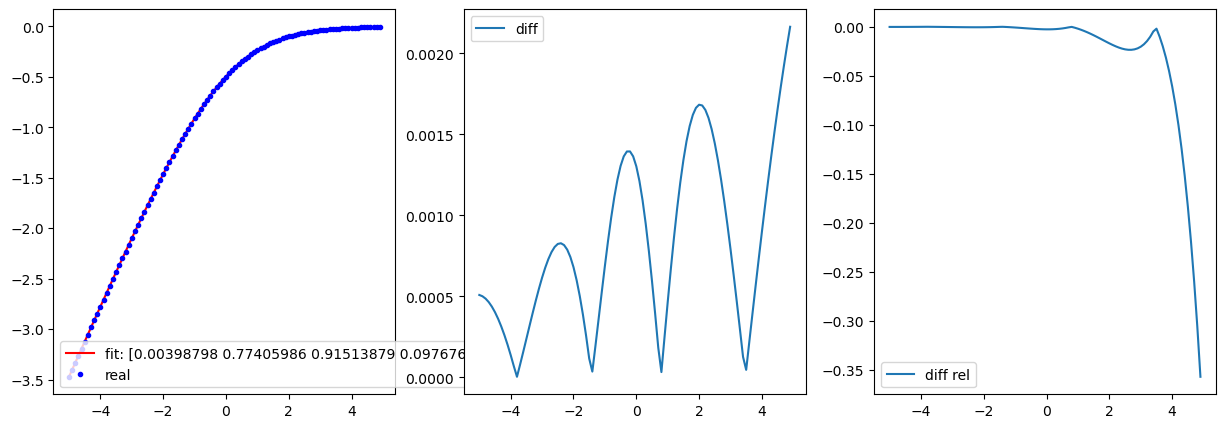

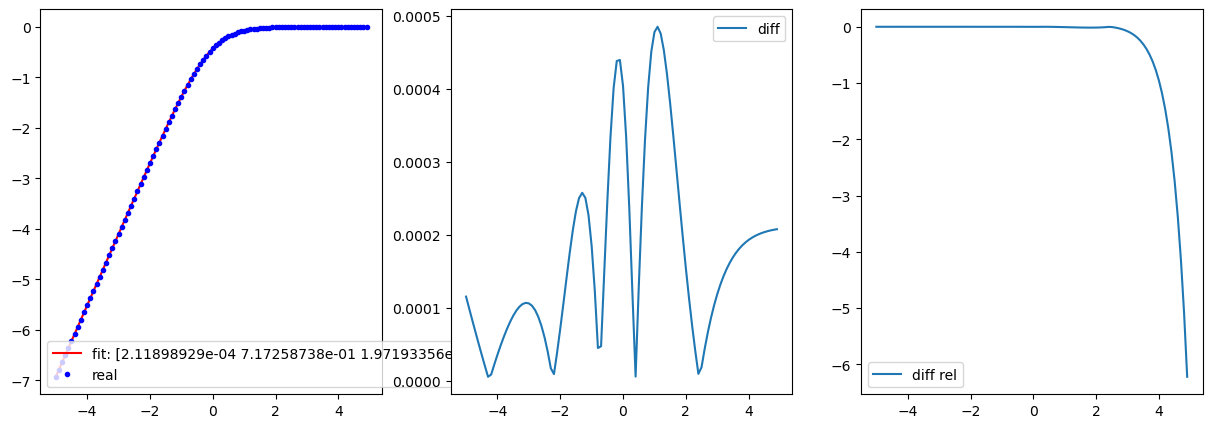

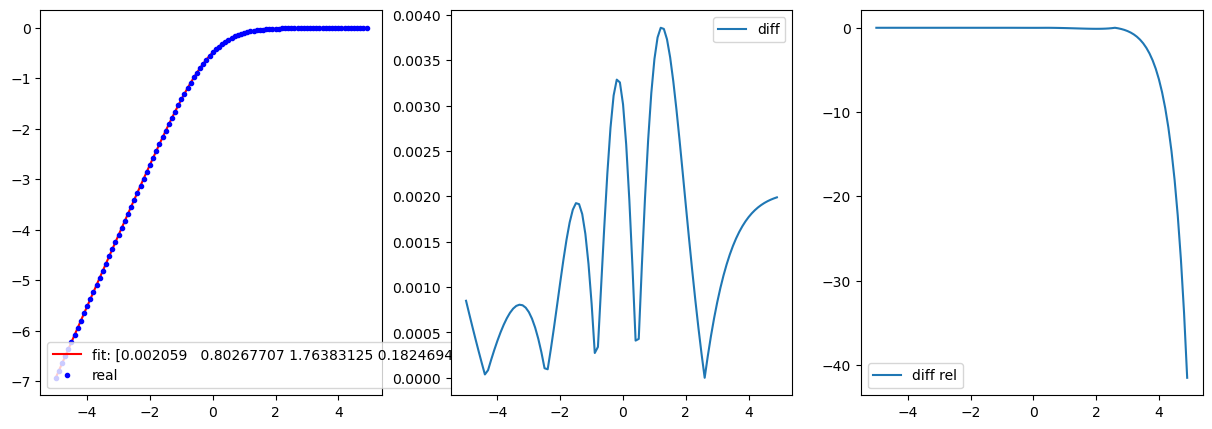

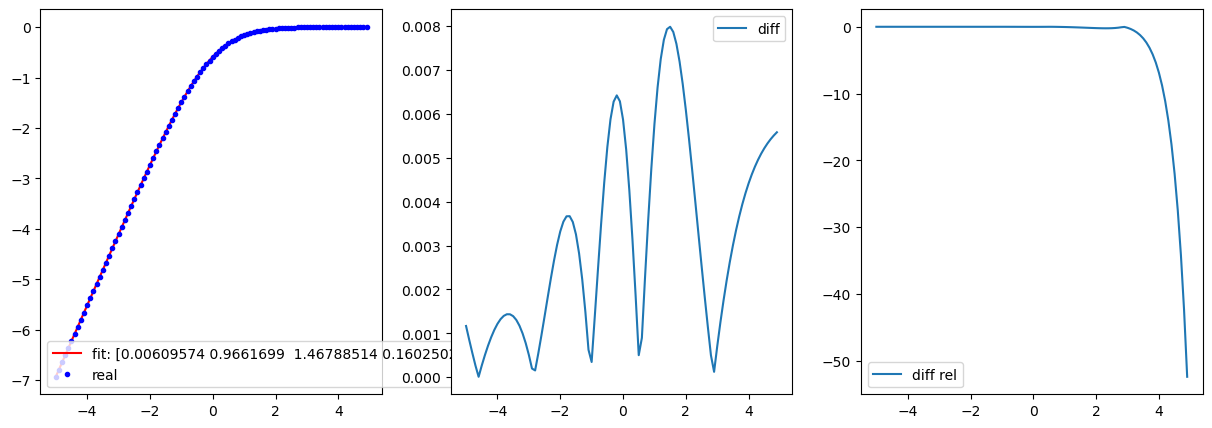

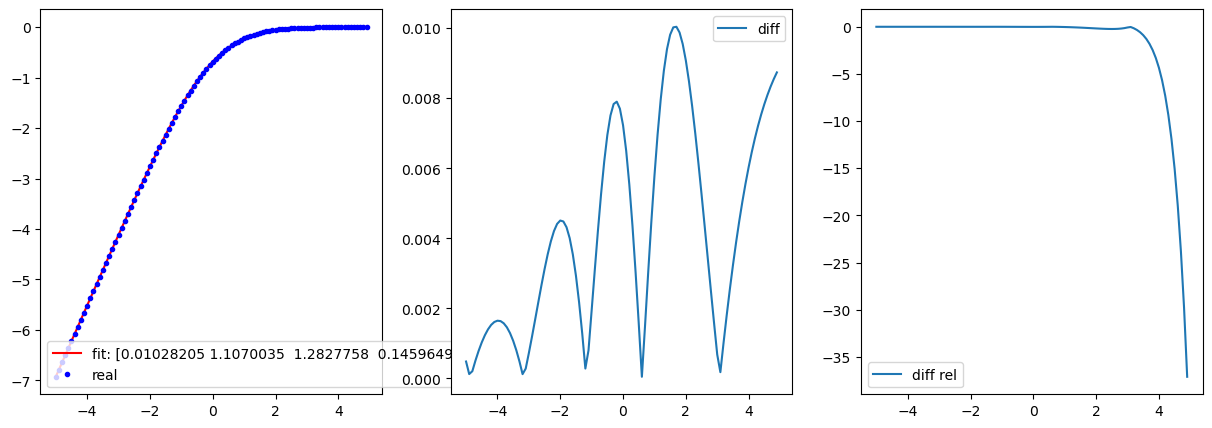

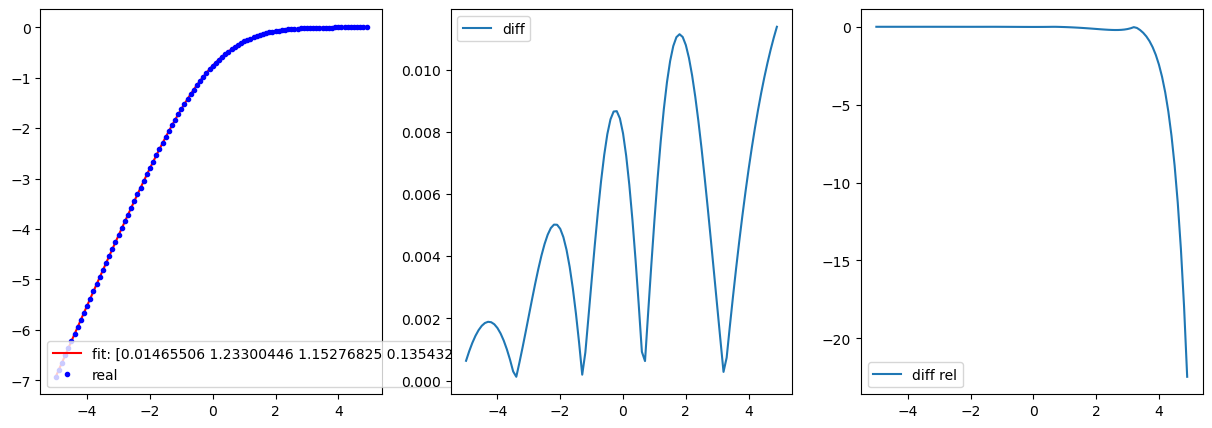

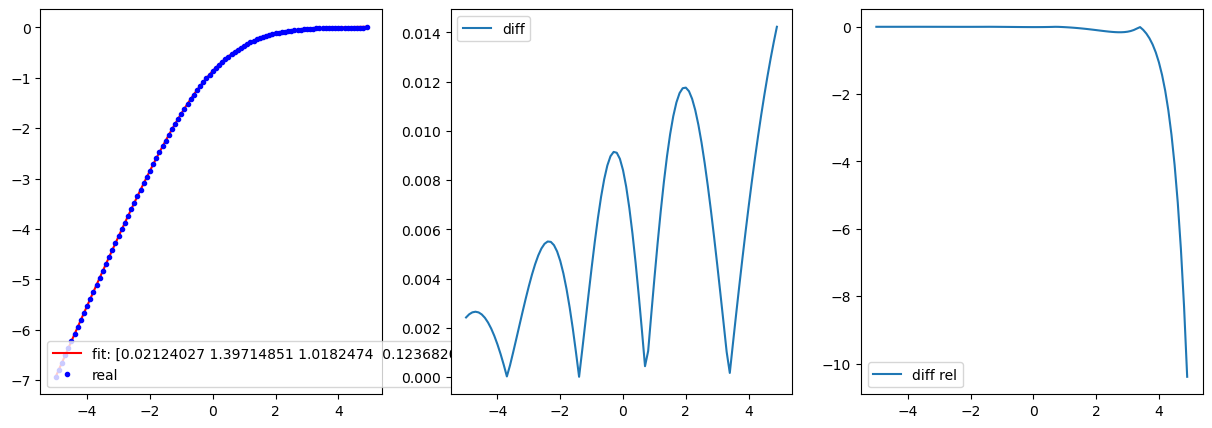

In [ ]:
q0=0.001
JJ=0.1
beta=1

for beta in 0.1, 1, 2:
    for q0 in 0.01, 0.1,0.3, 0.5,0.7, 0.99:
        print(f"beta {beta}")
        popt, pcov, y_diff, y_diff_rel = fit(f_rs, f_rs_approx, [q0,beta,JJ], p0=[0.01, q0,beta,JJ], plot=True)


In [ ]:
funct_int = lambda x: np.log(np.cosh(x))
funct_int = lambda x: log_expit(x)

def f_10rsb(h, q0=1, beta=1, JJ=0.01, m=1):
    def f_(x):
        return 1/np.sqrt(2*np.pi*q0) * np.exp(-((x)**2)/q0 + x - m * funct_int(beta*(JJ+beta*x+h)))
    return f_

def f_10rsb_approx(x, a0, a1, b1, a2, b2):
    return a0*(1 + np.exp(a1 + b1 * funct_int(b2*x+a2)))


beta 0.1
param 0.35
param -0.00013
param -0.16
param -0.26
param 0.1
beta 0.1
param 0.36
param -0.00075
param -0.16
param -0.26
param 0.1
beta 0.1
param 0.78
param -7.0
param -0.2
param -2.4e+01
param 0.28
beta 0.1
param 0.45
param -0.0015
param -0.16
param -0.25
param 0.1
beta 1
param 0.71
param 0.59
param 1.8e+05
param 1.1e+01
param -0.23
beta 1
param 0.73
param 0.59
param 1.8e+05
param 1.1e+01
param -0.23
beta 1
param 0.8
param 0.61
param 1.1e+05
param 1e+01
param -0.22
beta 1
param 0.91
param 0.62
param 2.3e+02
param 4.2
param -0.22
beta 2
param 0.71
param 1.5
param 2.2e+05
param 1.1e+01
param -0.28
beta 2
param 0.72
param 1.5
param 2.1e+05
param 1.1e+01
param -0.27
beta 2
param 0.8
param 1.6
param 2.8e+05
param 1.1e+01
param -0.25
beta 2
param 0.91
param 1.8
param 3.1e+05
param 1.1e+01
param -0.22


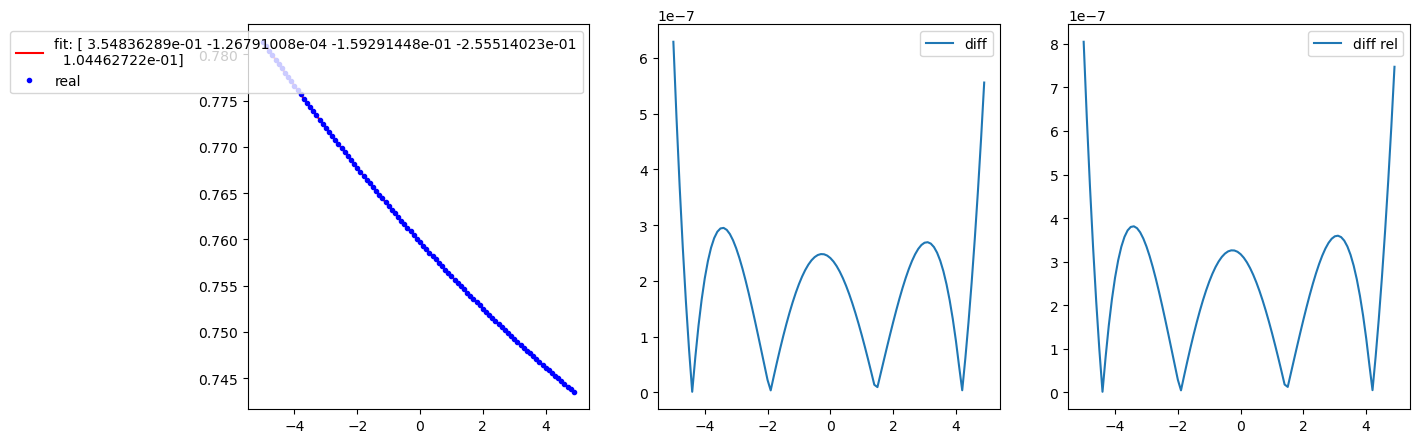

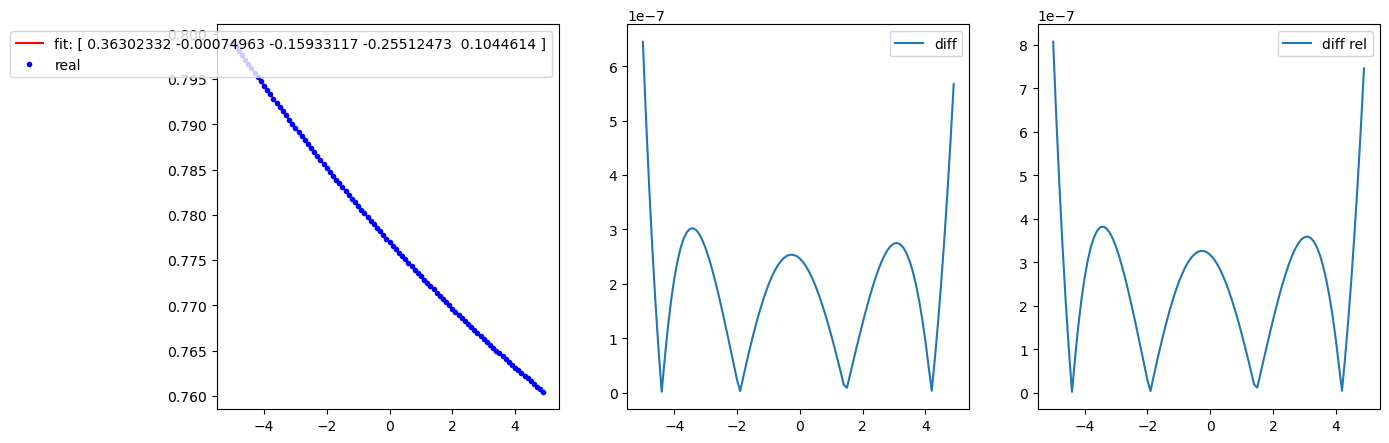

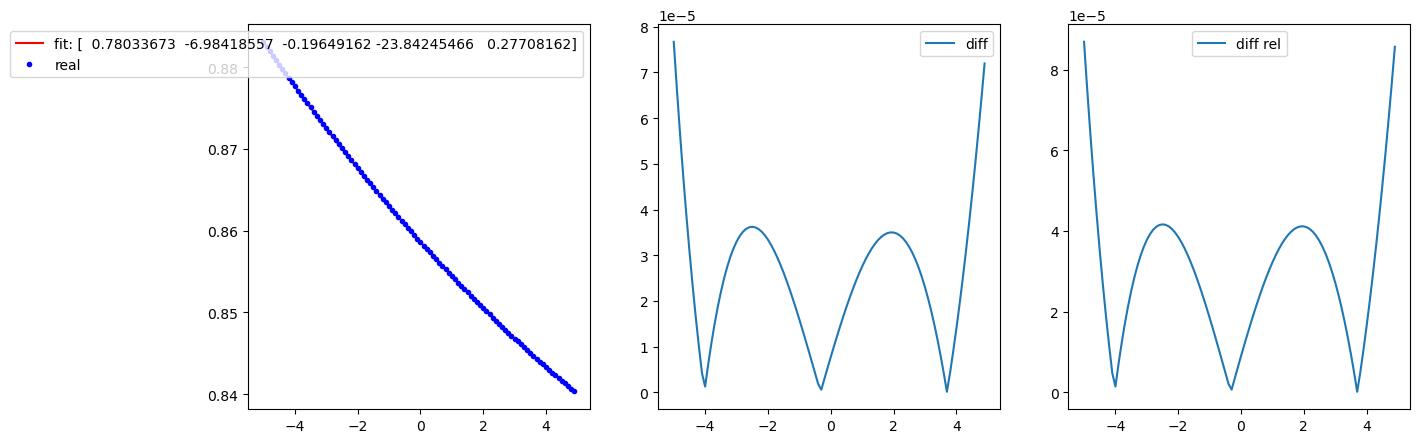

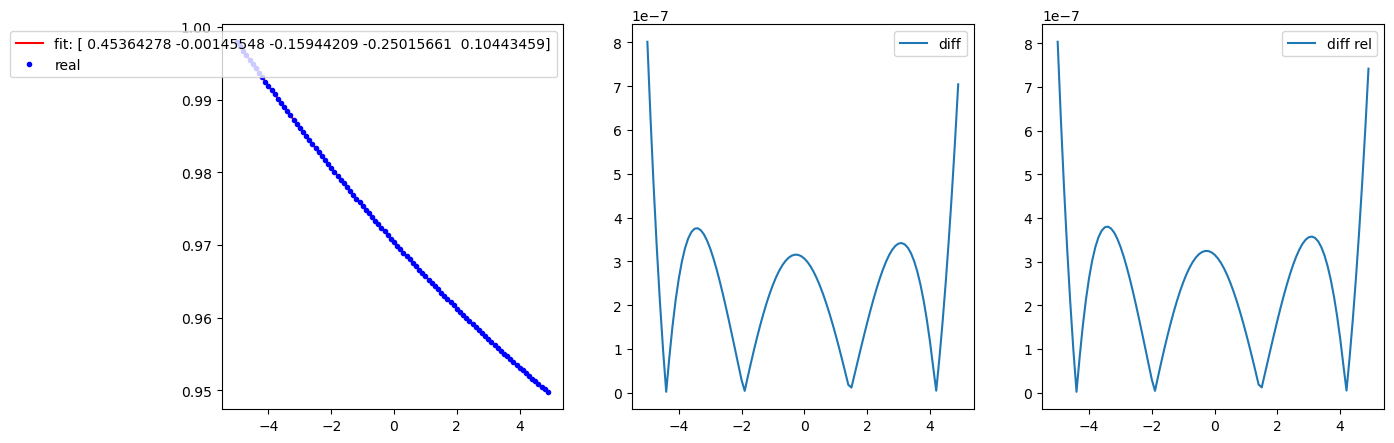

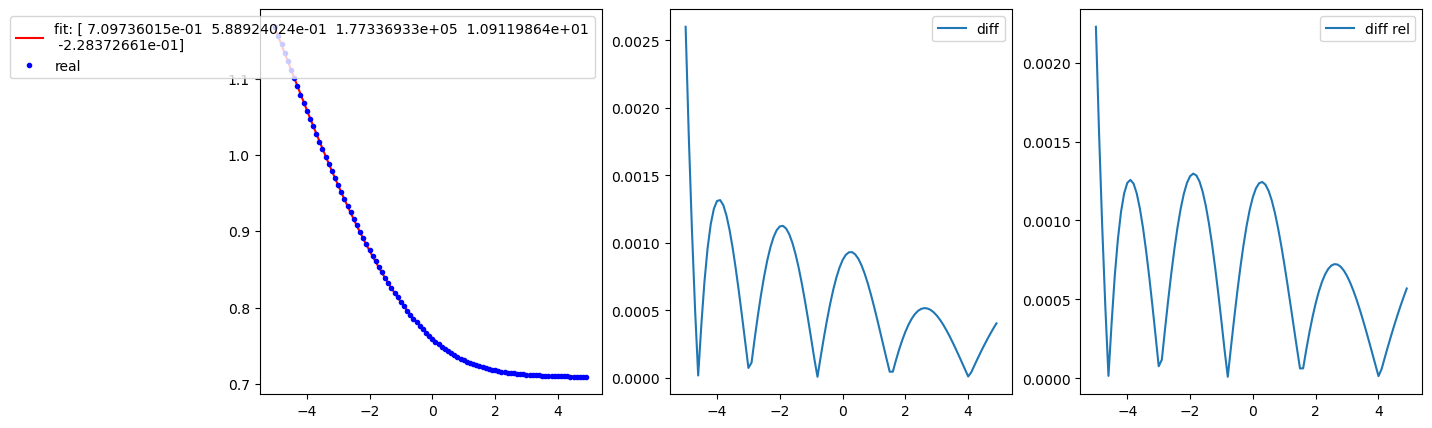

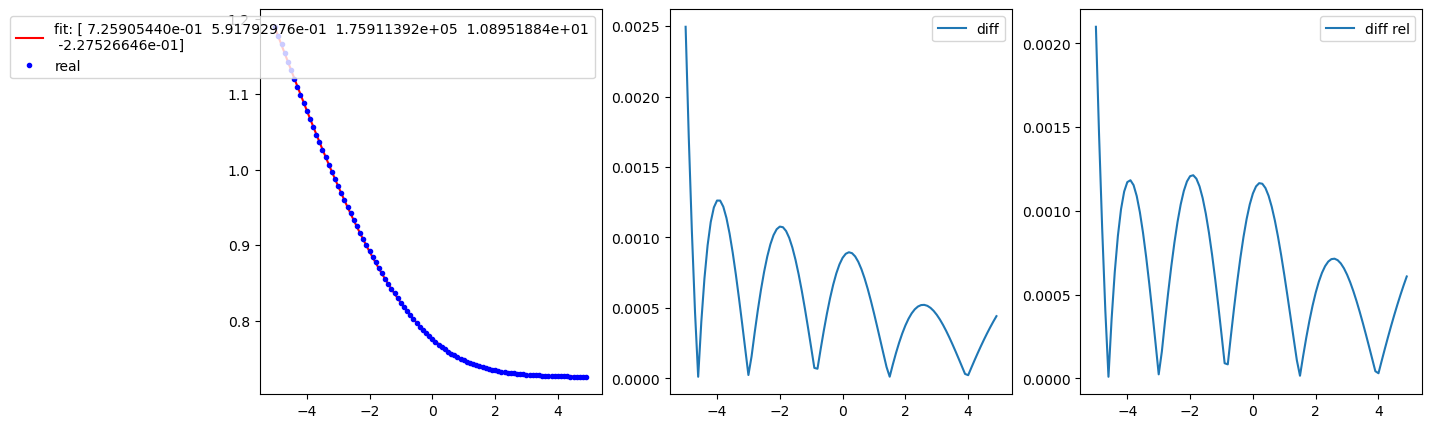

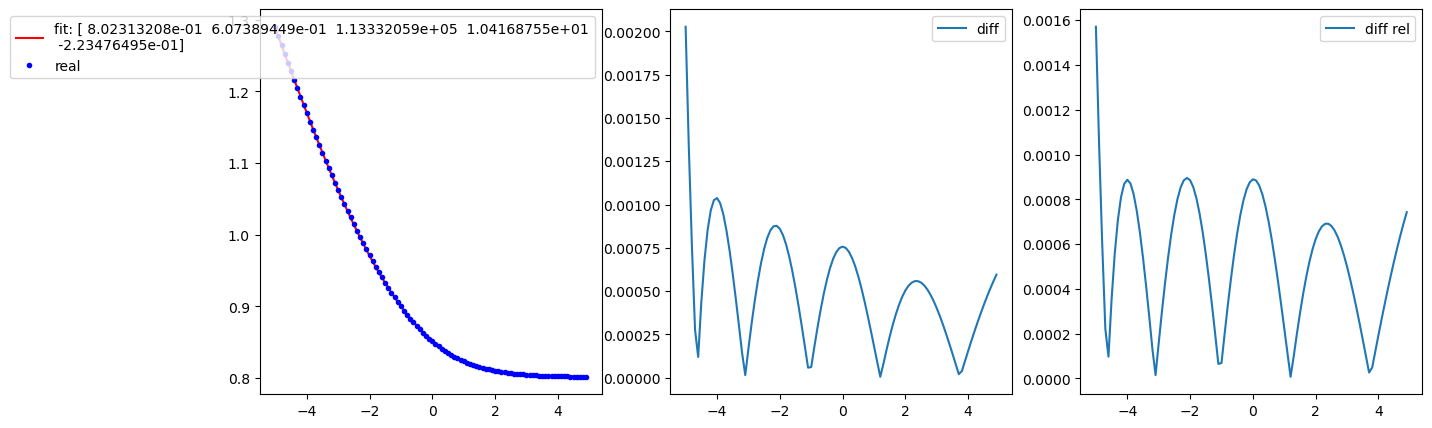

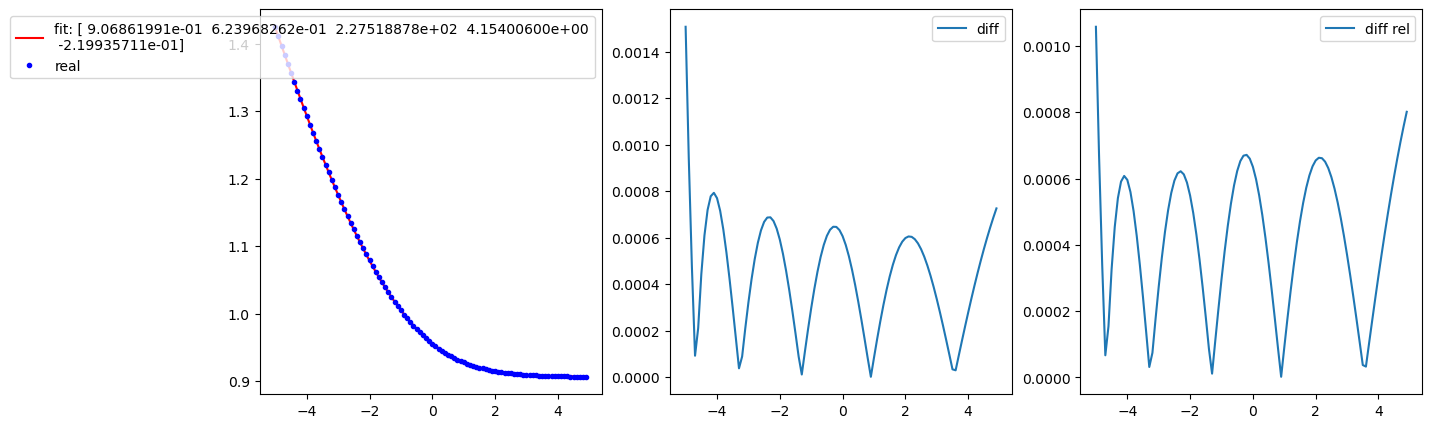

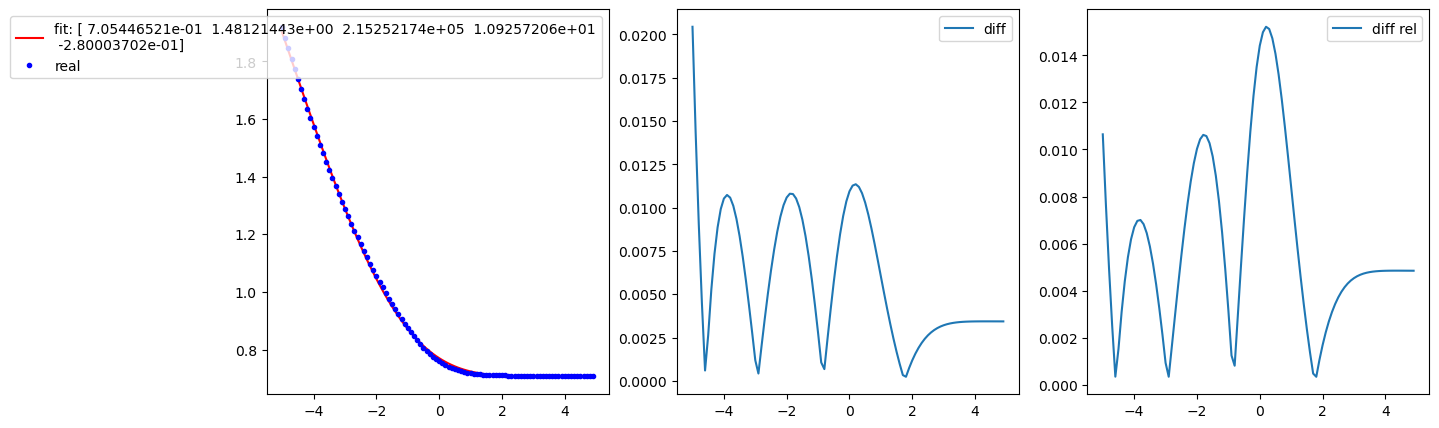

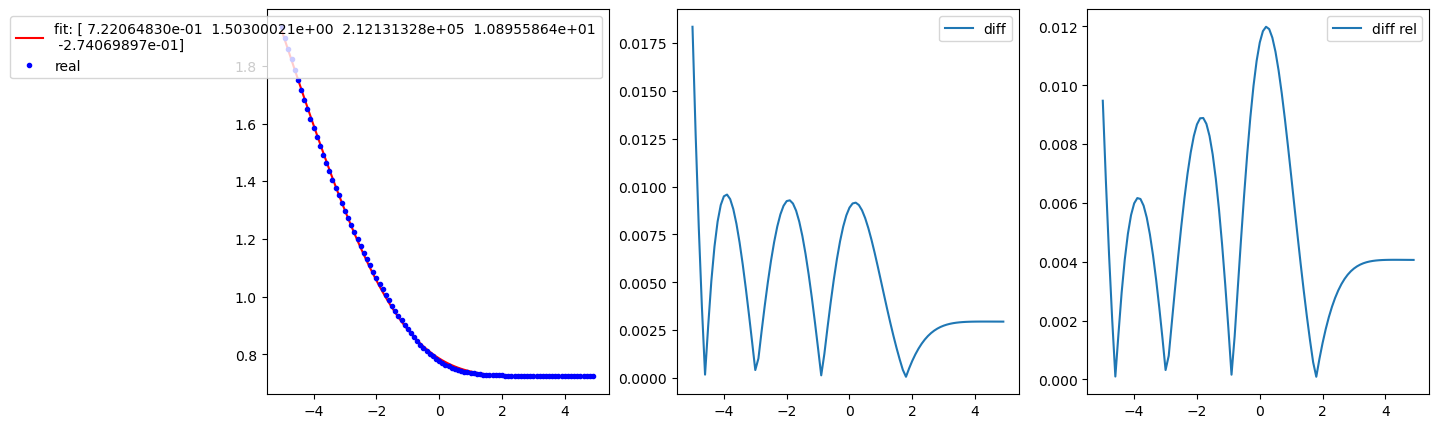

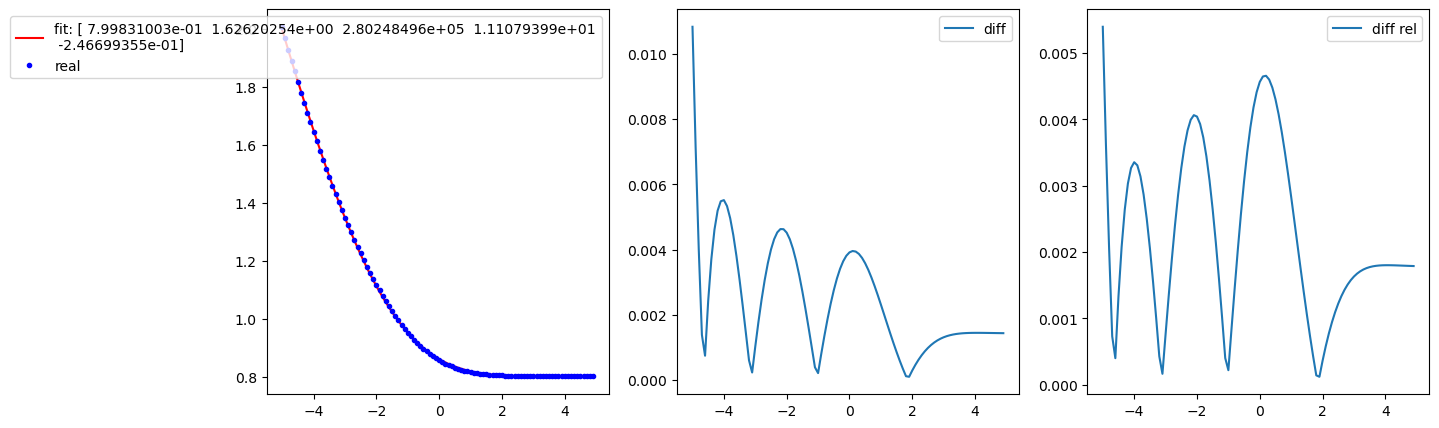

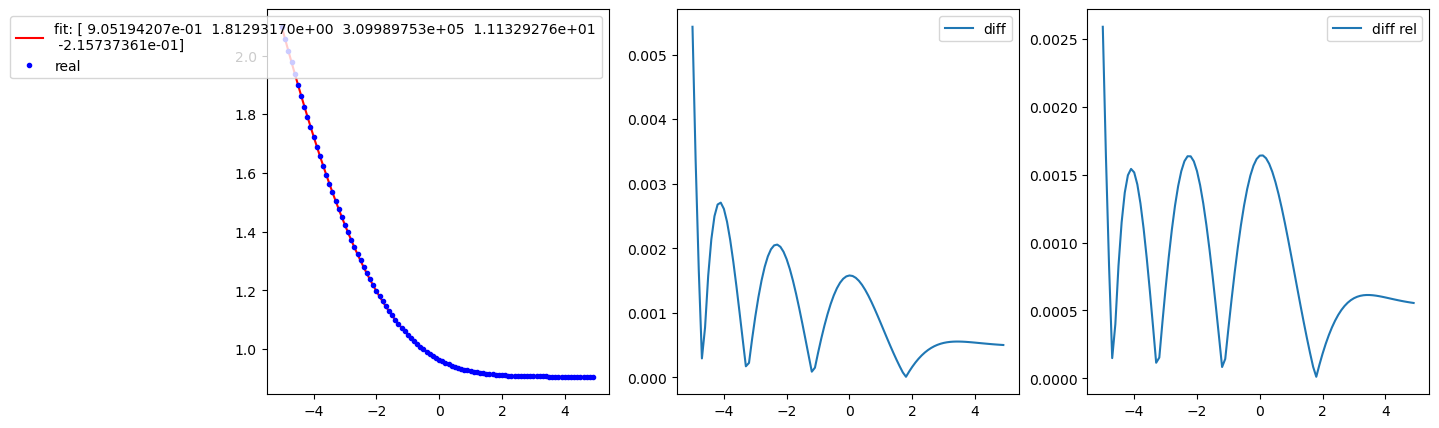

In [ ]:
q0=0.001
JJ=0.01
beta=1
m=0.1
for beta in 0.1, 1, 2:
    for q0 in 0.01, 0.1, 0.5, 0.99:
        print(f"beta {beta}")
        popt, pcov, y_diff, y_diff_rel = fit(f_10rsb, f_10rsb_approx, [q0,beta,JJ, m], plot=True)


In [ ]:
funct_int = lambda x: np.log(np.cosh(x))
funct_int = lambda x: log_expit(x)

def f_1rsb(h, q0, a1, b1, a2, b2):
    def f_(x):
        return 1/np.sqrt(2*np.pi*q0) * np.exp(-((x)**2)/q0)*log_expit(a1 +b1 * log_expit(b2*(x+h)+a2))
    return f_

def f_1rsb_approx(x, a0, b0, a1, b1, a2, b2):
    return a0 + b0*log_expit(a1 + b1*log_expit(a2 + b2 * (x)))


beta 2
param 3.2
param 0.29
param -1.1e+01
param 0.016
param 0.24
param 4.1


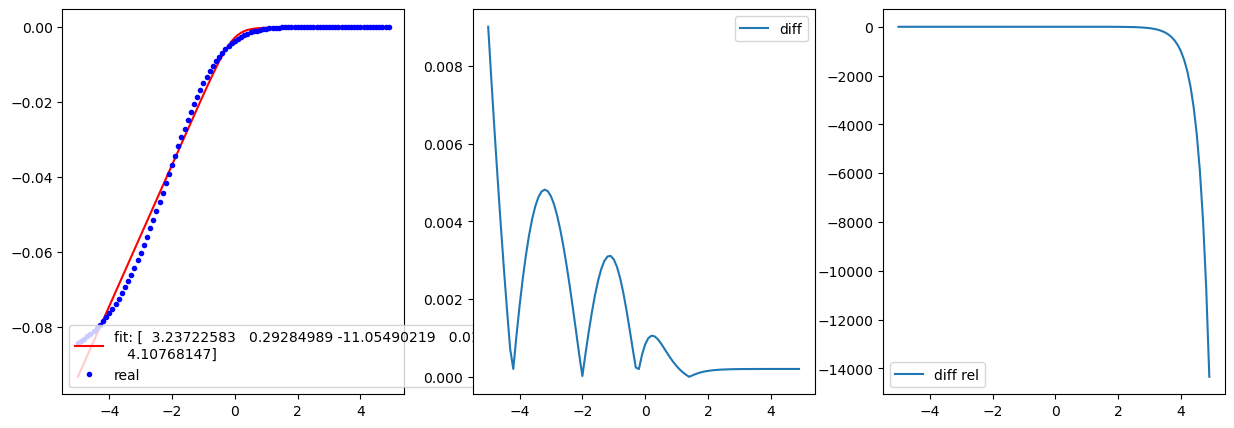

In [ ]:
a1=2
b1=-3
a2=-1
b2=-1
q0=0.9
print(f"beta {beta}")
popt, pcov, y_diff, y_diff_rel = fit(f_1rsb, f_1rsb_approx, [q0,a1,b1,a2,b2], plot=True)


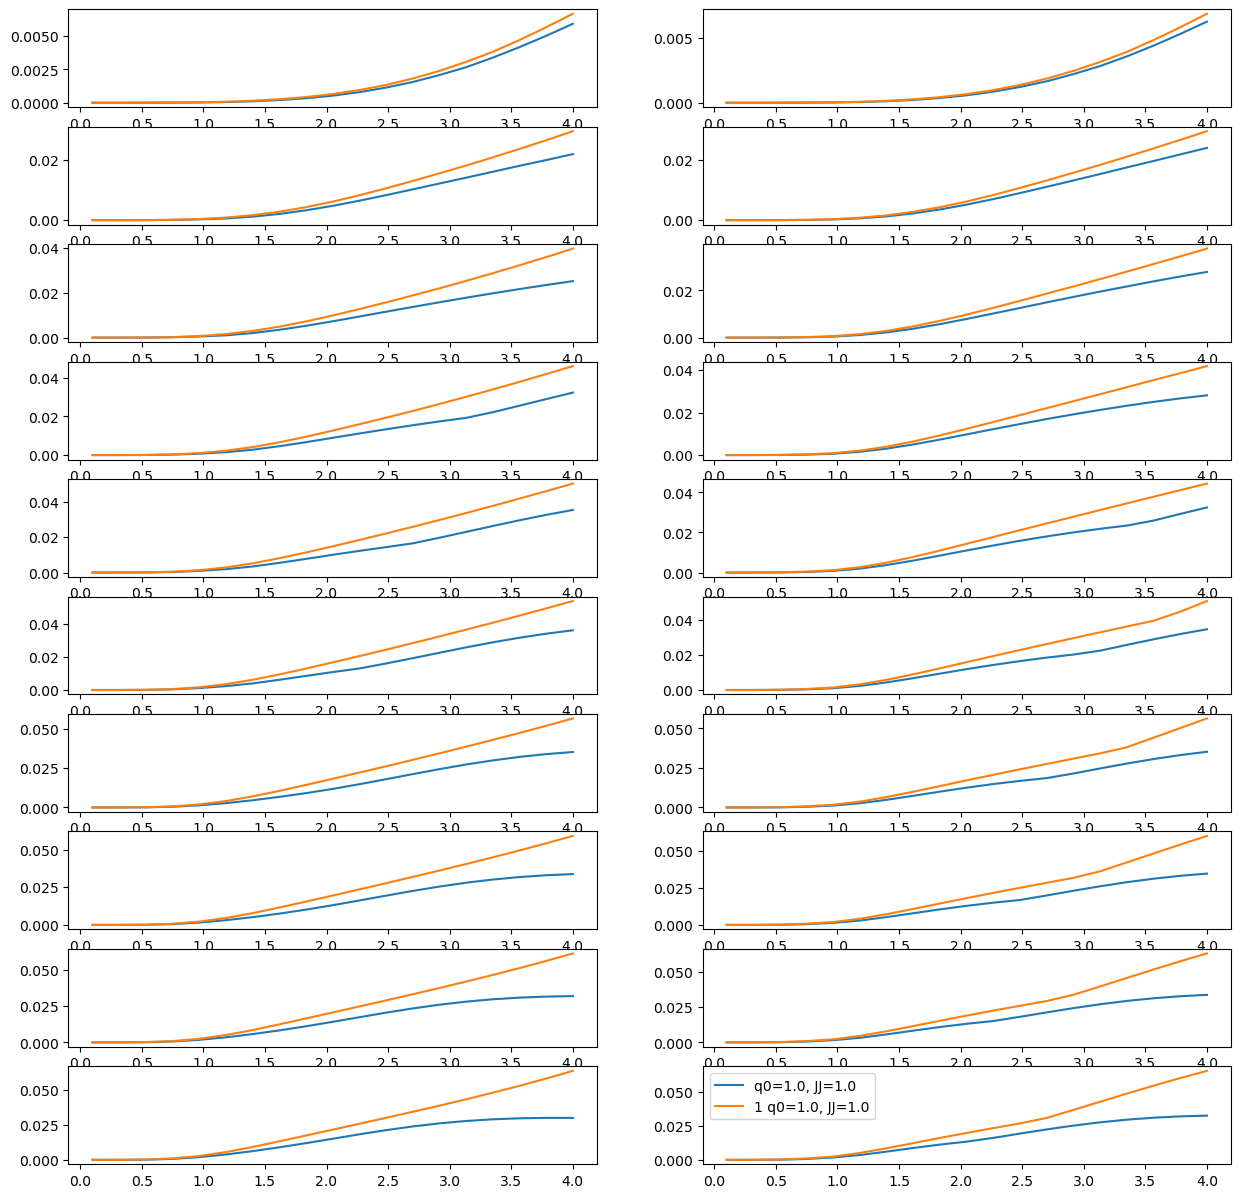

In [ ]:
import matplotlib.pyplot as plt
max_rel = {}
max_rel1 = {}
q0s = np.linspace(0.01,1,10)
JJs = np.linspace(0.01,1,2)
betas= np.linspace(0.1,4,19)
for q0 in q0s:
    max_rel[q0] = {}
    max_rel1[q0] = {}
    for JJ in JJs:
        max_rel[q0][JJ] = []
        max_rel1[q0][JJ] = []
        for beta in betas:
            popt, pcov, y_diff, y_diff_rel = fit(f_rs, f_rs_approx, [q0,beta,JJ], p0=[0.01, q0,beta,JJ])
            popt1, pcov1, y_diff1, y_diff_rel1 = fit(f_rs, f_rs_approx1, [q0,beta,JJ], p0=[q0,beta,JJ])
            max_rel[q0][JJ].append(np.max(y_diff))
            max_rel1[q0][JJ].append(np.max(y_diff1))

fig, axs = plt.subplots(len(q0s), len(JJs), figsize=(15,15))
for i, q0 in enumerate(q0s):
    for ii, JJ in enumerate(JJs):
        axs[i][ii].plot(betas, max_rel[q0][JJ], label=f"q0={q0}, JJ={JJ}")
        axs[i][ii].plot(betas, max_rel1[q0][JJ], label=f"1 q0={q0}, JJ={JJ}")
plt.legend()

In [ ]:
from scipy.special import log_expit, expit

funct_int = lambda x: np.cosh(x)

def f_rsb1_1(h, q0=1, beta=1, JJ=0.01, m=1):
    def f_(x):
        return (1./np.sqrt(q0)) * np.exp(-((x)**2)/q0) * (funct_int(beta*(JJ+x+h)))**m
    return f_

def f_rsb1_approx1(x, a, b, c, d, e):
    return a + b * funct_int(c*x+d)**e
    
def f_rsb1_approx12(x, b, c, d, e):
    return 1+b * funct_int(c*x+d)**e

def f_rsb1_approx13(x, b, c, d, e):
    return b * funct_int(c*x+d)**e


param -0.0058
param 1.9
param 1.8
param 0.71
param 0.56


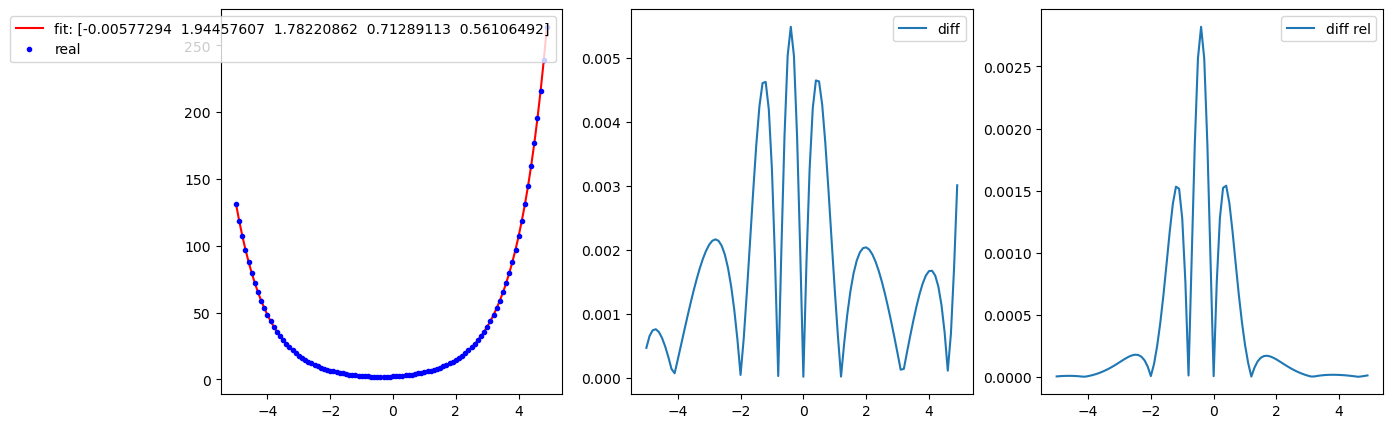

In [ ]:
q0=0.2
beta=2
JJ=0.4
m=0.5
p0, _ = fit(f_rsb1_1, f_rsb1_approx1, [q0, beta, JJ, m], p0=[-1, q0, beta, JJ, m])

param 1.9
param 1.8
param 0.72
param 0.56


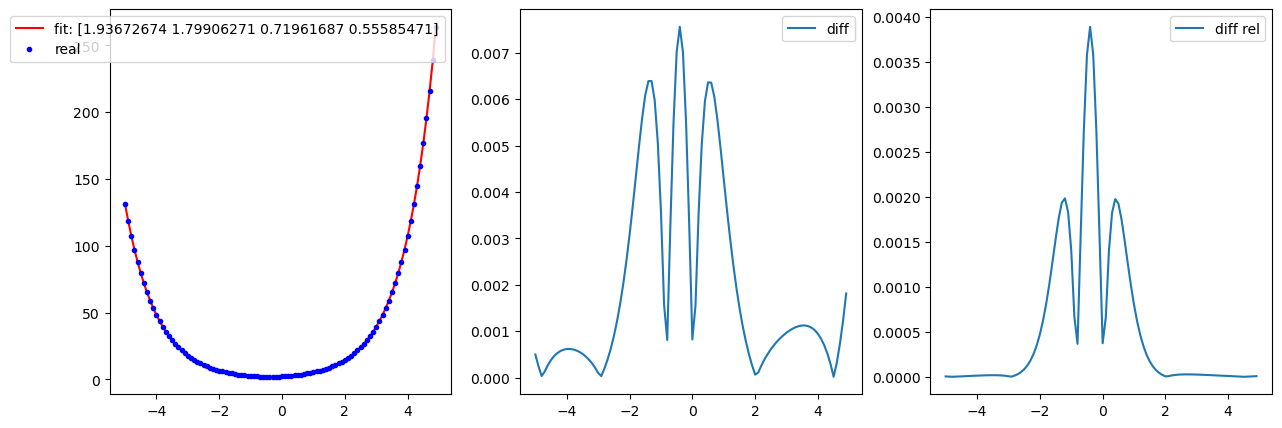

In [ ]:
p0, _ = fit(f_rsb1_1, f_rsb1_approx13, [q0, beta, JJ, m], p0=p0[1:])

/var/folders/jy/gjfds_4d4xsfqkq02klzlj240000gn/T/ipykernel_16527/1412141523.py:3: RuntimeWarning: overflow encountered in cosh
  funct_int = lambda x: np.cosh(x)
/var/folders/jy/gjfds_4d4xsfqkq02klzlj240000gn/T/ipykernel_16527/1412141523.py:13: RuntimeWarning: overflow encountered in power
  return 1+b * funct_int(c*x+d)**e


param 1.4
param -8.2e+01
param -8.2e+01
param 0.016


(array([ 1.40228726e+00, -8.22411976e+01, -8.23590710e+01,  1.55270046e-02]),
 array([[4.47217370e-01, 2.43657256e+03, 2.44006465e+03, 4.60079060e-01],
        [2.43657256e+03, 1.32753137e+07, 1.32943398e+07, 2.50667434e+03],
        [2.44006465e+03, 1.32943398e+07, 1.33133932e+07, 2.51026690e+03],
        [4.60079060e-01, 2.50667434e+03, 2.51026690e+03, 4.73315842e-01]]))

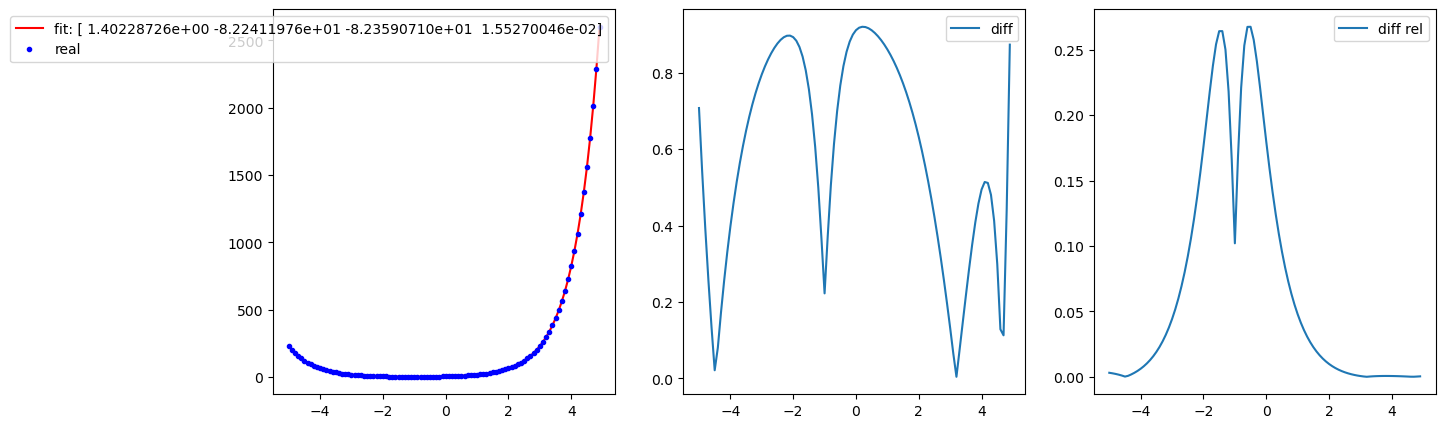

In [ ]:
fit(f_rsb1_1, f_rsb1_approx12, [0.3,2.5,1, 0.51], p0=p0)

In [ ]:
from scipy.special import log_expit, expit

funct_int = lambda x: np.cosh(x)

def f_rsb1_1(h, q0=1, beta=1, JJ=0.01, m=1):
    def f_(x):
        return 1/np.sqrt(q0) * np.exp(-((x)**2)/q0) * funct_int(beta*(JJ+x+h))**m
    return f_

def f_rsb1_approx1(x, a, b, c, d, e):
    return a + b * funct_int(c*x+d)**e


In [ ]:
def f_1rsb_1(h, q0=1, a=1, b=1, c=1, d=1):
    def f_(x):
        return np.exp(-((x)**2)/q0) * log_expit(a + b * log_expit(c*(x+h) + d))
    return f_
def f_1rsb_1_approx(x, a1, b1, a2, b2, a3, b3):
    return a1 + b1 * log_expit(a2 + b2 * log_expit( a3 + b3 * x))


In [ ]:
from scipy.special import log_expit, expit

funct_int = lambda x: log_expit(x)

def f_rs(h, q0=1, beta=1, JJ=0.01):
    def f_(x):
        return 1/np.sqrt(q0) * np.exp(-((x)**2)/q0) * funct_int(2*beta*(JJ+x+h))
    return f_

def f_rs_approx(x, a, b, c, d):
    return a + b * funct_int(c*x+d)


/var/folders/jy/gjfds_4d4xsfqkq02klzlj240000gn/T/ipykernel_16527/460250534.py:7: RuntimeWarning: invalid value encountered in power
  return 1/np.sqrt(q0) * np.exp(-((x)**2)/q0) * funct_int(2*beta*(JJ+x+h))**m


ValueError: array must not contain infs or NaNs

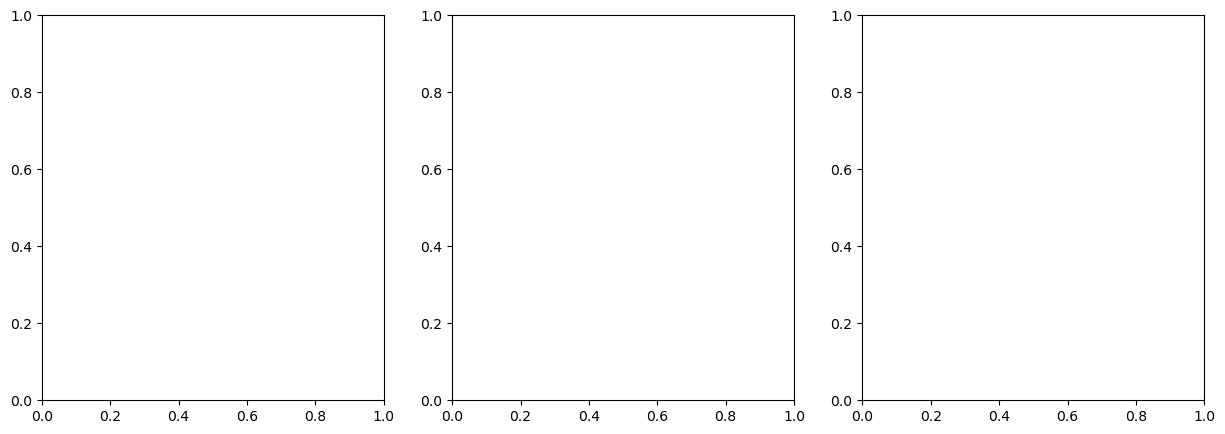

In [ ]:
fit(f_rs, f_rs_approx, [0.2,2.5,1])

In [ ]:
    
def f_1rsb_0(h, q1=1, m1=0.5, m1_=1, beta=1):
    def f_(x):
        return np.exp(-((x)**2)/q1 + m1_*x + m1*log_expit(beta*(x+h)))
    return f_
def f_1rsb_0_approx(x, a, b, c, d, e):
    return a + np.exp(b + c * log_expit(d*x+e))

def f_1rsb_1(h, q0=1, a=1, b=1, c=1, d=1):
    def f_(x):
        return np.exp(-((x)**2)/q0) * log_expit(a + b * log_expit(c*(x+h) + d))
    return f_
def f_1rsb_1_approx(x, a1, b1, a2, b2, a3, b3):
    return a1 + b1 * log_expit(a2 + b2 * log_expit( a3 + b3 * x))

def f_2rsb_0(h, q0=1, a=1, b=1, c=1, d=1, e=1 ,f=1):
    def f_(x):
        return np.exp(-((x)**2)/q0) * log_expit(f + e*log_expit(a + b * log_expit(c*(x+h) + d)))
    return f_
def f_2rsb_0_approx(x, a0, b0, a1, b1, a2, b2, a3, b3):
    return a0 + b0 * log_expit(a1 + b1 * log_expit(a2 + b2 * log_expit( a3 + b3 * x)))

def f_2rsb_0_approx_serial(x, a0, b0, a1, b1, a2, b2, a3, b3):
    return a0 + b0 * log_expit(a1 + b1 * log_expit( a2 * x)) + b2 * log_expit( a3 + b3 * x)

def f_2rsb_1_approx_serial(x, a0, b0, a1, b1,a11, b11, a2,a22, b2, a3, b3):
    return a0 + b0 * log_expit(a1 + b1 * log_expit( a2 * x)) + b2 * log_expit(a11 + b11 * log_expit( a22 * x))


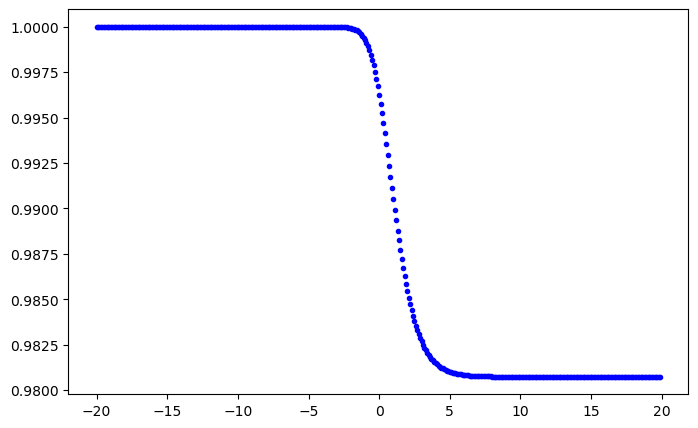

In [ ]:
def f_2rsb_0_approx(x, a0, b0, a1, b1, a2, b2, a3, b3):
    return a0 + b0 * log_expit(a1 + b1 * log_expit(a2 + b2 * log_expit( a3 + b3 * x)))

plot_fit(f_2rsb_0_approx,[1, 1, 3, -3, 1, 1, -1, 1], range=20, dx=0.1 )

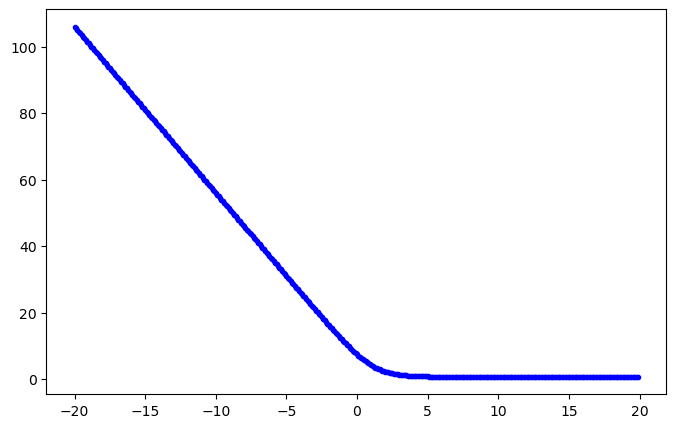

In [ ]:

plot_fit(f_2rsb_0_approx_serial,[1, 1, 1, -1, 2, -5, -1, 1], range=20, dx=0.1 )

param 5.7e+03
param 4e+02
param 2.7e+01
param 4.9e+01
param 2.7e+01
param 4.9e+01
param 0.001
param 0.001
param 4e+02
param 1.0
param 1.0


/Users/ocadni/opt/anaconda3/envs/m1torch/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


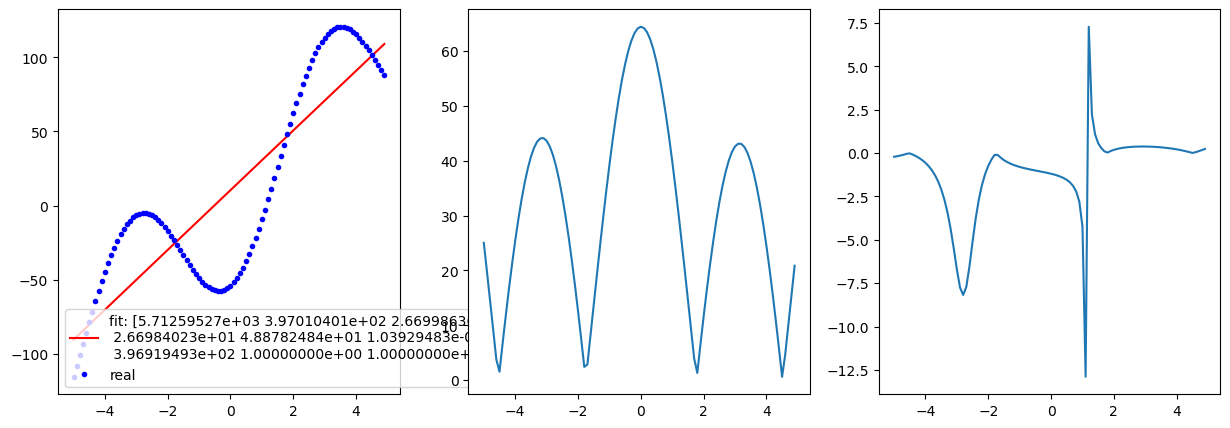

In [ ]:
fit(f_cos_mon, f_2rsb_1_approx_serial, [50,1])

param -0.0026
param 0.35
param 1.0
param 1.7
param 0.44


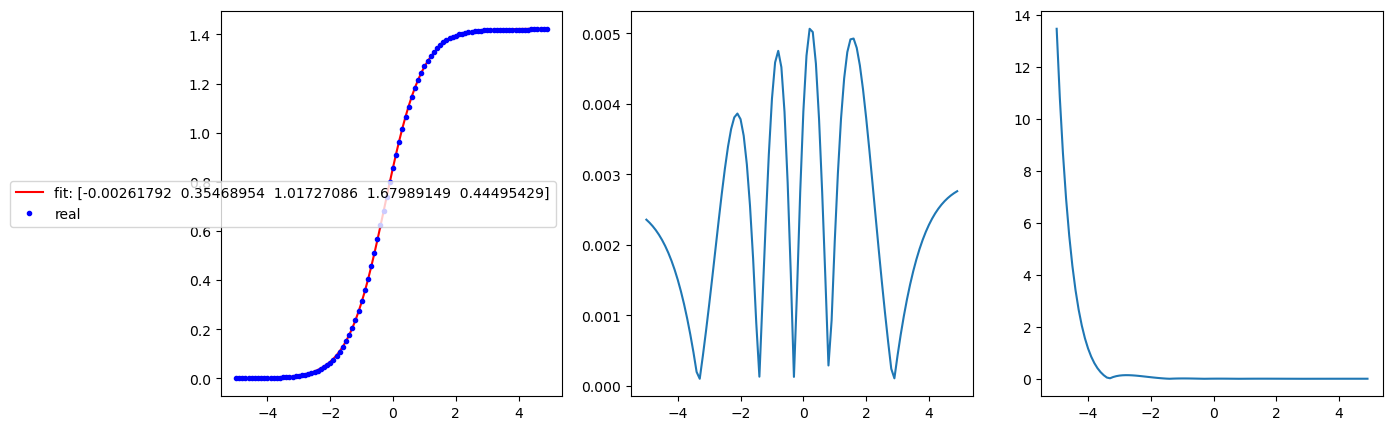

In [ ]:
fit(f_1rsb_0, f_1rsb_0_approx, [0.5,1,1,2])

param -0.0024
param 0.0083
param 4.3e+01
param 5.8
param -3.2e+01
param -7.6


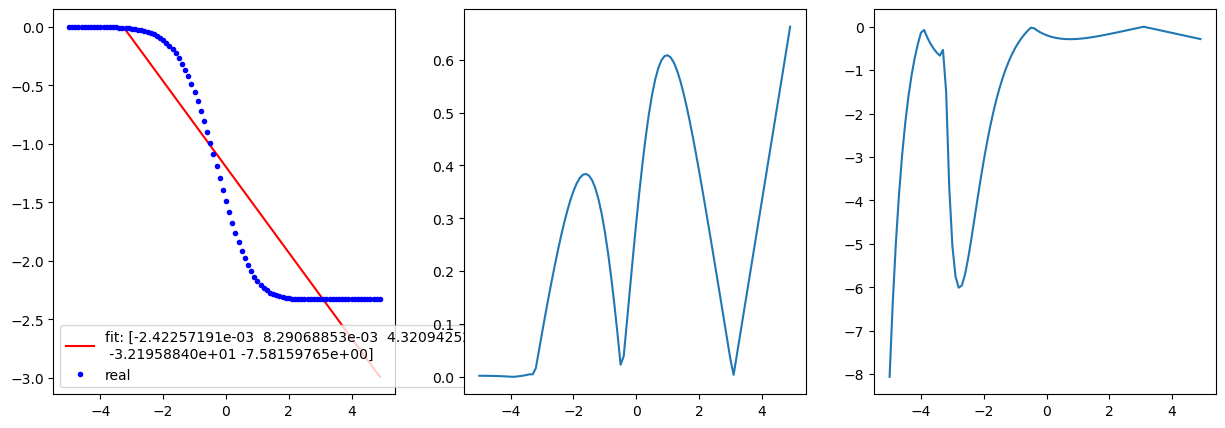

In [ ]:
fit(f_1rsb_1, f_1rsb_1_approx, [1, -1, -0.4, 5.2, -1.2])

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 100000.

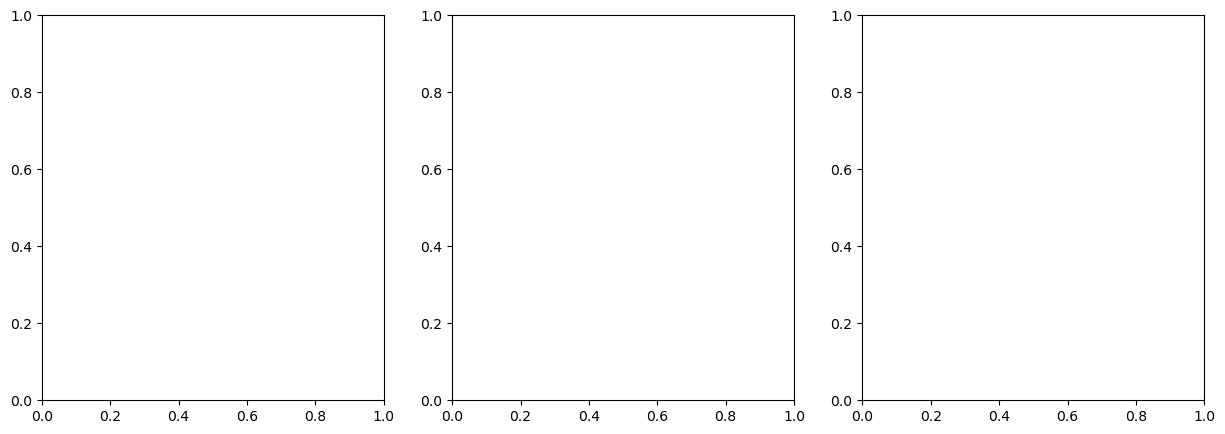

In [ ]:
fit(f_2rsb_0, f_2rsb_0_approx, [1, -1, -1.4, -.1, -1, -0.3, -1])

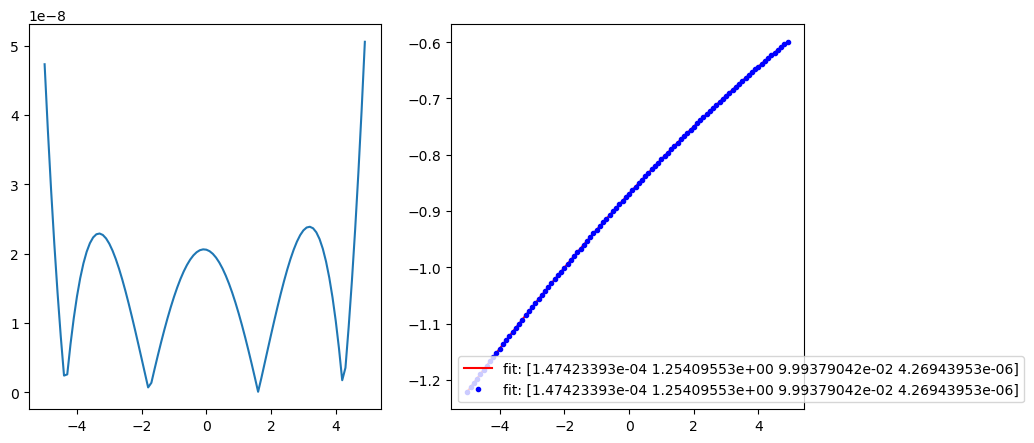

In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

x = np.arange(-5,5,0.1)
true_func = f_rs
fit_func = f_rs_approx
y = []
params_true = [0.5,0.1]
for b in x:
    y.append(int_f(true_func(b, *params_true)))

popt, pcov = curve_fit(fit_func, x, y, maxfev = 100000, ftol=1e-12, xtol=1e-12, gtol=1e-12)
#plt.plot(x, 1.7*np.log(np.cosh(x))+0.4)
ax2.plot(x, fit_func(x, *popt), 'r-',
         label=f'fit: {popt}')
ax2.plot(x, y, 'b.',
         label=f'fit: {popt}')
#ax2.set_ylim(0,2)
ax1.plot(x, np.abs(fit_func(x, *popt)- y),
         label='diff')
plt.legend()

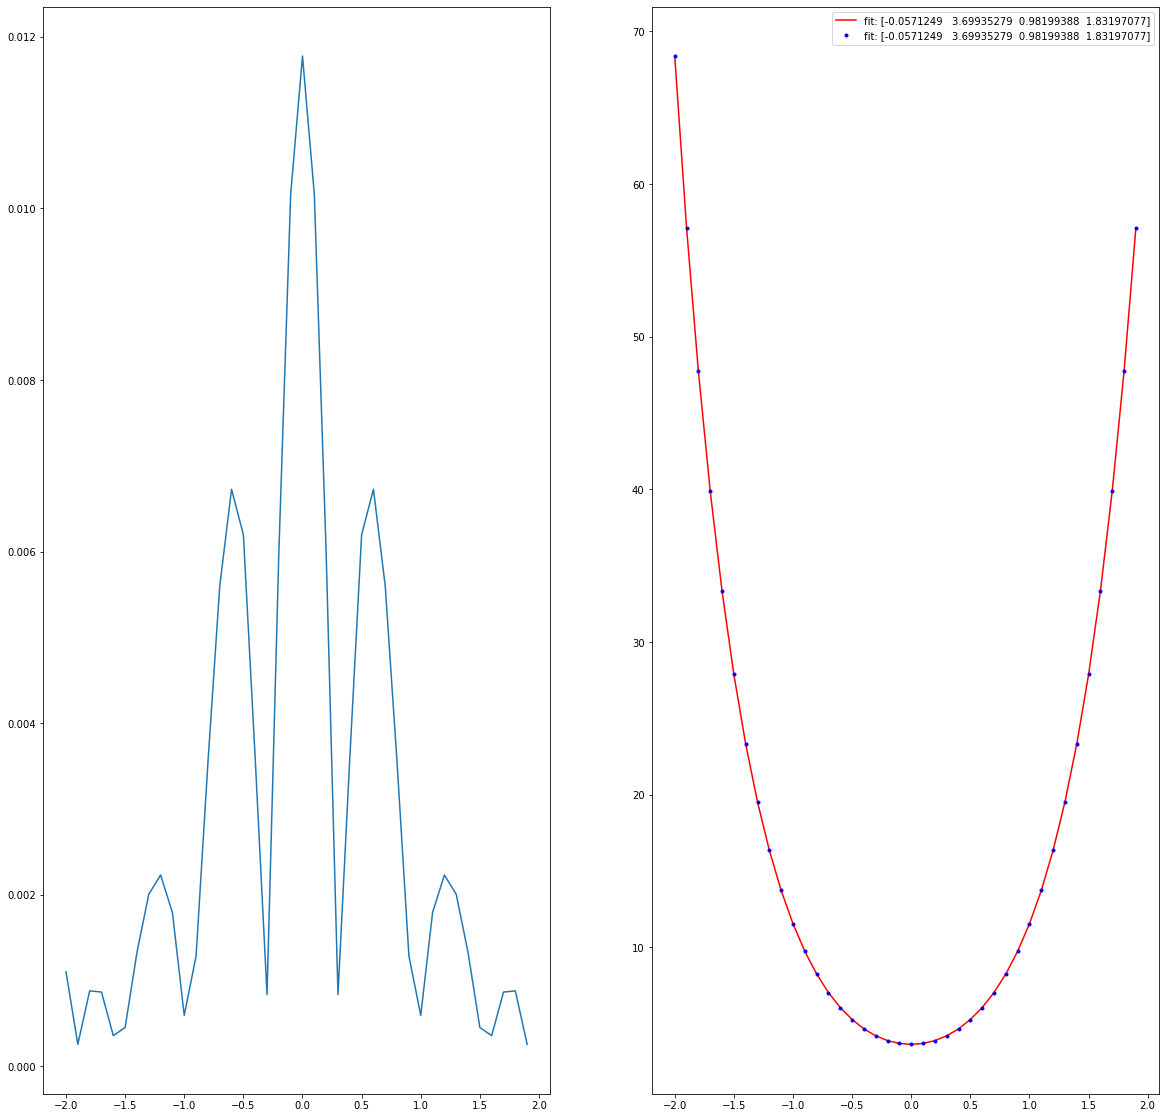

In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))

x = np.arange(-2,2,0.1)
true_func = f_1rsb_0
fit_func = f_1rsb_0_approx
y = []
params_true = [0.9,0.9,2]
for b in x:
    y.append(int_f(true_func(b, *params_true)))

popt, pcov = curve_fit(fit_func, x, y, maxfev = 100000)
#plt.plot(x, 1.7*np.log(np.cosh(x))+0.4)
ax2.plot(x, fit_func(x, *popt), 'r-',
         label=f'fit: {popt}')
ax2.plot(x, y, 'b.',
         label=f'fit: {popt}')
#ax2.set_ylim(0,2)
ax1.plot(x, 100*np.abs(fit_func(x, *popt)- y)/y,
         label='diff')
plt.legend()

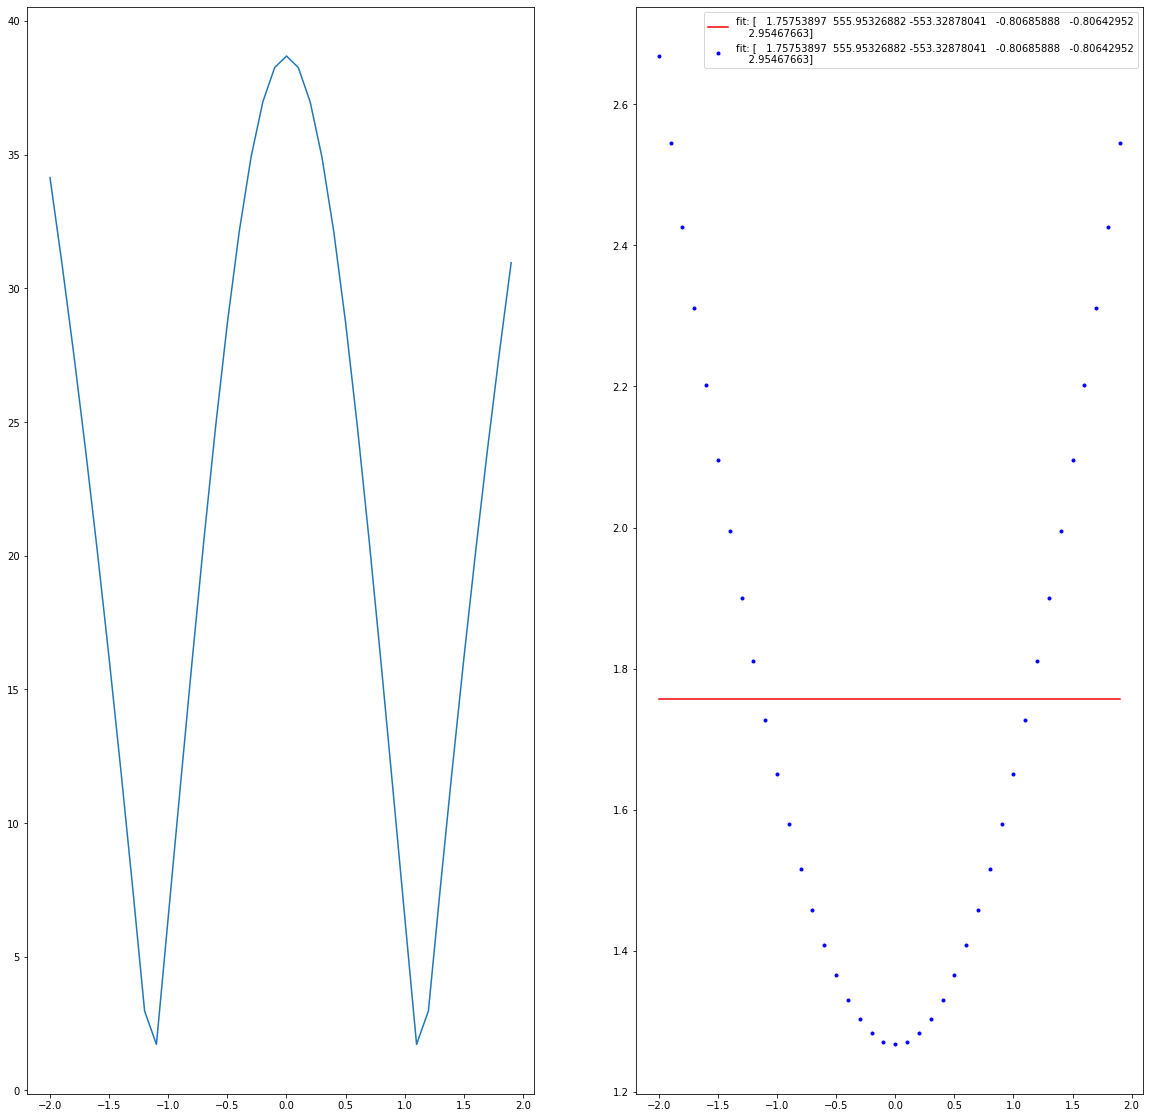

In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))

x = np.arange(-2,2,0.1)
true_func = f_1rsb_1
fit_func = f_1rsb_1_approx
y = []
params_true = [0.9,0.9,1,1]
for b in x:
    y.append(int_f(true_func(b, *params_true)))

popt, pcov = curve_fit(fit_func, x, y, maxfev = 100000)
#plt.plot(x, 1.7*np.log(np.cosh(x))+0.4)
ax2.plot(x, fit_func(x, *popt), 'r-',
         label=f'fit: {popt}')
ax2.plot(x, y, 'b.',
         label=f'fit: {popt}')
#ax2.set_ylim(0,2)
ax1.plot(x, 100*np.abs(fit_func(x, *popt)- y)/y,
         label='diff')
plt.legend()

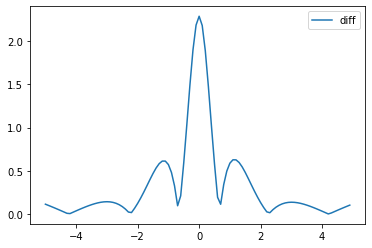

In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c, d):
    return a * np.log(np.cosh(d*x+c)) + b

x = np.arange(-5,5,0.1)
y = []
h0=0
a=1
for b in x:
    y.append(int_f(f(b, h0, a)))

#plt.plot(x,y)
xx=np.arange(-1,1,0.01)
yy=0.65*xx**2+0.4
#plt.plot(xx,yy)
xxx=np.arange(1,5,0.01)
yyy=1.8*xxx-1
#plt.plot(xxx,yyy)
x2=np.arange(-5,5,0.01)
popt, pcov = curve_fit(func, x, y)
#plt.plot(x, 1.7*np.log(np.cosh(x))+0.4)
#plt.plot(x, func(x, *popt), 'r-',
#         label='fit: a=%5.3f, b=%5.3f, c=%5.3f,d=%5.3f,' % tuple(popt))
plt.plot(x, 100*np.abs(func(x, *popt)- y)/y,
         label='diff')
plt.legend()

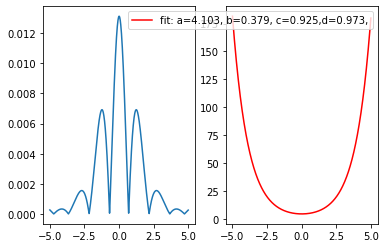

In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

fig, (ax1, ax2) = plt.subplots(1, 2)

def func_m(x, a, b, c, d):
    return (a * np.cosh(c*x) + b)**d

x = np.arange(-5,5,0.01)
y = []
h0=0
a=2
m=0.9
c=0.2
for b in x:
    y.append(int_f(f_m(b, h0=h0, a=a, m=m, c=c), dx=0.01))

#plt.plot(x,y)
popt, pcov = curve_fit(func_m, x, y, maxfev = 100000, p0=[1,0.1,1,m])
#plt.plot(x, 1.7*np.log(np.cosh(x))+0.4)
ax2.plot(x, func_m(x, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f,d=%5.3f,' % tuple(popt))
ax1.plot(x, 100*np.abs(func_m(x, *popt)- y)/y,
         label='diff')
plt.legend()

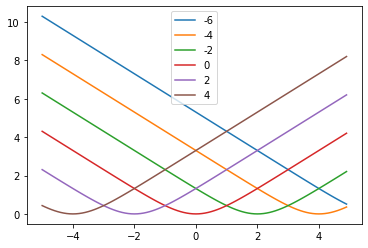

In [ ]:
bb = np.arange(-6,6,2)
y = []
for b in bb:
    x = np.arange(-5,5,0.1)
    y = f1(b,x)
    plt.plot(x,y, label=f"{b}")
plt.legend()
